# Healthcare EDA


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Analysis

In [ ]:
df = pd.read_excel('Healthcare_dataset.xlsx')
df.head()

Ptid Persistency_Flag  Gender           Race     Ethnicity   Region  \
0   P1       Persistent    Male      Caucasian  Not Hispanic     West   
1   P2   Non-Persistent    Male          Asian  Not Hispanic     West   
2   P3   Non-Persistent  Female  Other/Unknown      Hispanic  Midwest   
3   P4   Non-Persistent  Female      Caucasian  Not Hispanic  Midwest   
4   P5   Non-Persistent  Female      Caucasian  Not Hispanic  Midwest   

  Age_Bucket        Ntm_Speciality Ntm_Specialist_Flag  \
0        >75  GENERAL PRACTITIONER              Others   
1      55-65  GENERAL PRACTITIONER              Others   
2      65-75  GENERAL PRACTITIONER              Others   
3        >75  GENERAL PRACTITIONER              Others   
4        >75  GENERAL PRACTITIONER              Others   

       Ntm_Speciality_Bucket  ... Risk_Family_History_Of_Osteoporosis  \
0  OB/GYN/Others/PCP/Unknown  ...                                   N   
1  OB/GYN/Others/PCP/Unknown  ...                                   N   
2  OB/GYN/Others/PCP/Unknown  ...                                   N   
3  OB/GYN/Others/PCP/Unknown  ...                                   N   
4  OB/GYN/Others/PCP/Unknown  ...                                   N   

  Risk_Low_Calcium_Intake  Risk_Vitamin_D_Insufficiency  \
0                       N                             N   
1                       N                             N   
2                       Y                             N   
3                       N                             N   
4                       N                             N   

  Risk_Poor_Health_Frailty Risk_Excessive_Thinness  \
0                        N                       N   
1                        N                       N   
2                        N                       N   
3                        N                       N   
4                        N                       N   

  Risk_Hysterectomy_Oophorectomy Risk_Estrogen_Deficiency Risk_Immobilization  \
0                              N                        N                   N   
1                              N                        N                   N   
2                              N                        N                   N   
3                              N                        N                   N   
4                              N                        N                   N   

  Risk_Recurring_Falls Count_Of_Risks  
0                    N              0  
1                    N              0  
2                    N              2  
3                    N              1  
4                    N              1  

[5 rows x 69 columns]

In [ ]:
df.isnull().sum()[df.isnull().sum() != 0]

Series([], dtype: int64)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

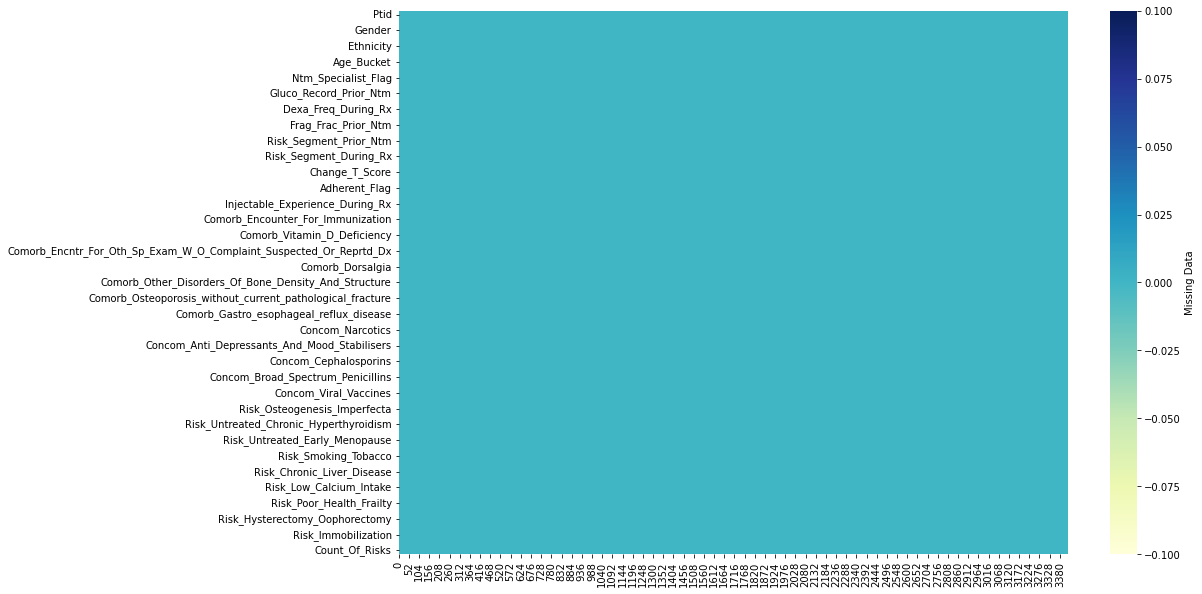

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

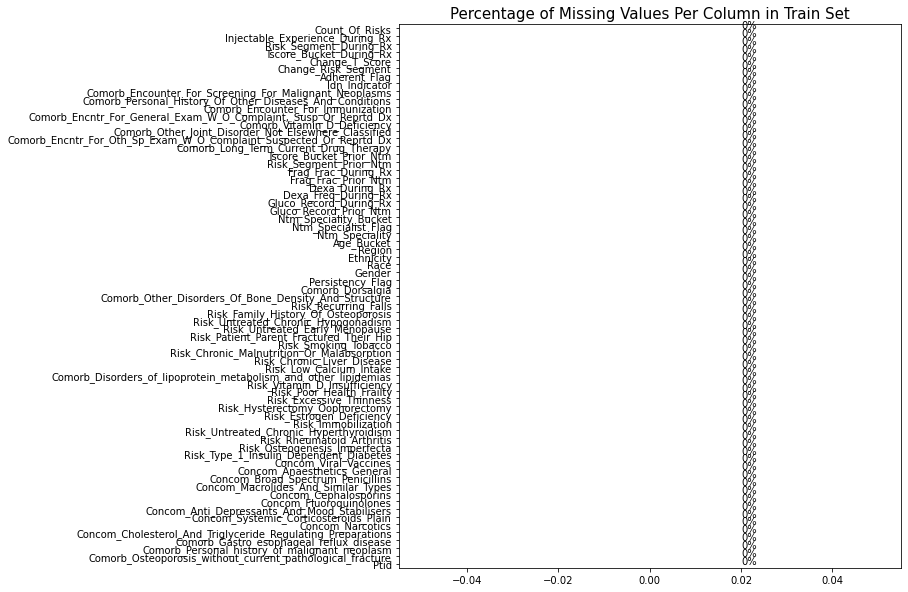

In [ ]:
ax = df.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/df.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

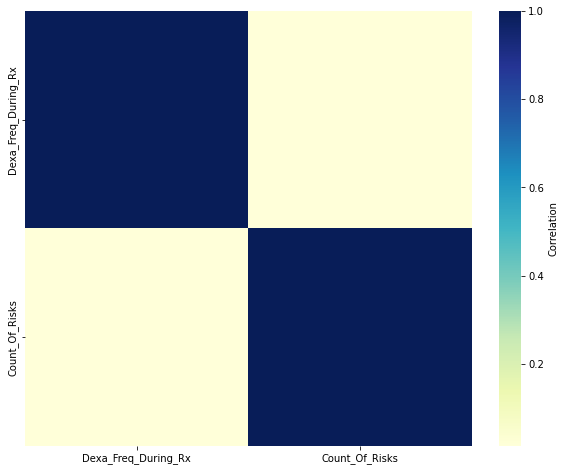

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Correlation'})

### Outliers

In [ ]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_df = numerical_columns_selector(df)
categorical_df = categorical_columns_selector(df)

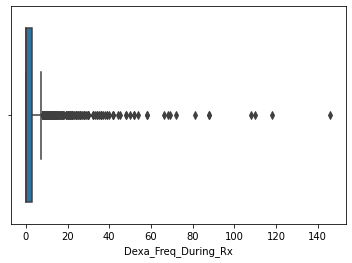

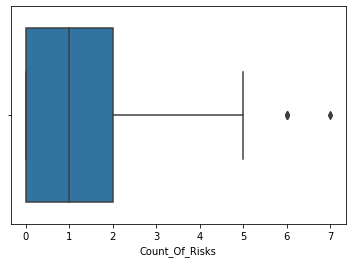

In [ ]:
for num in numerical_df:
    plt.figure()
    sns.boxplot(x = df[num])

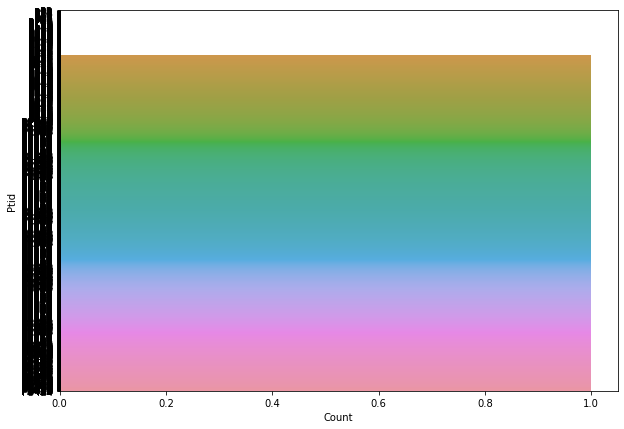

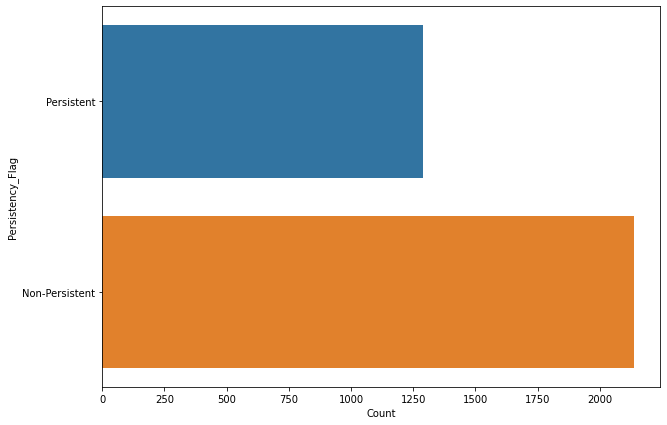

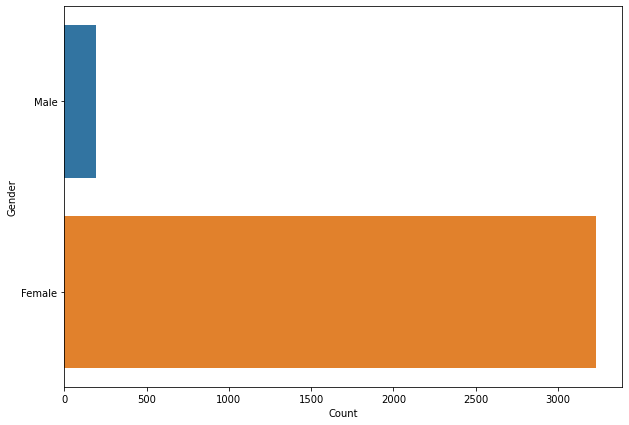

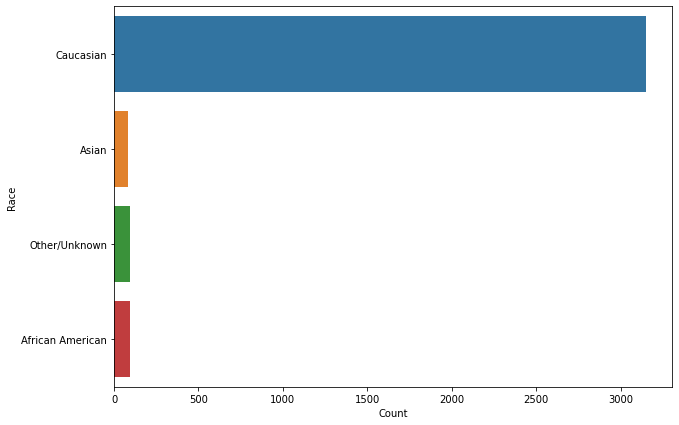

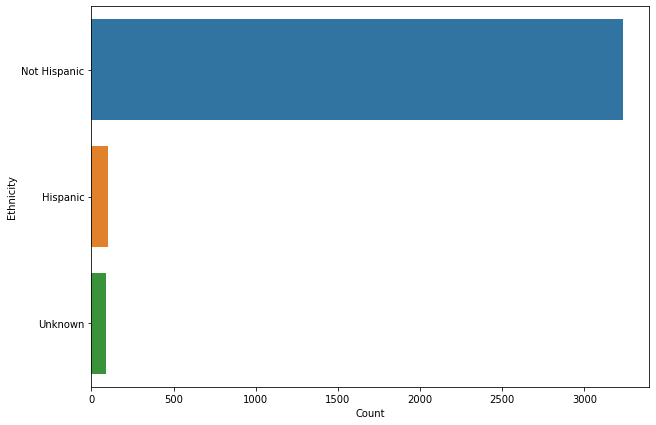

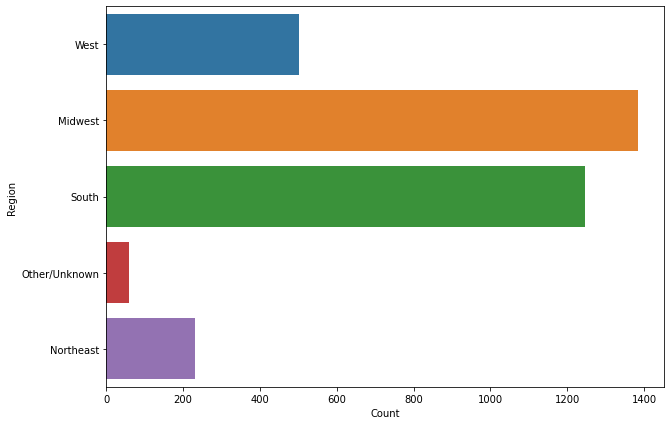

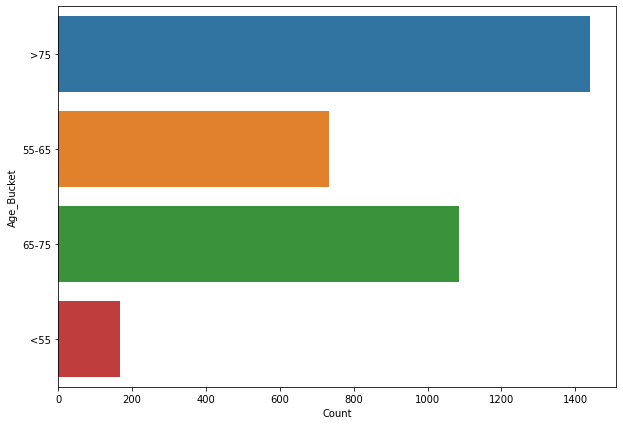

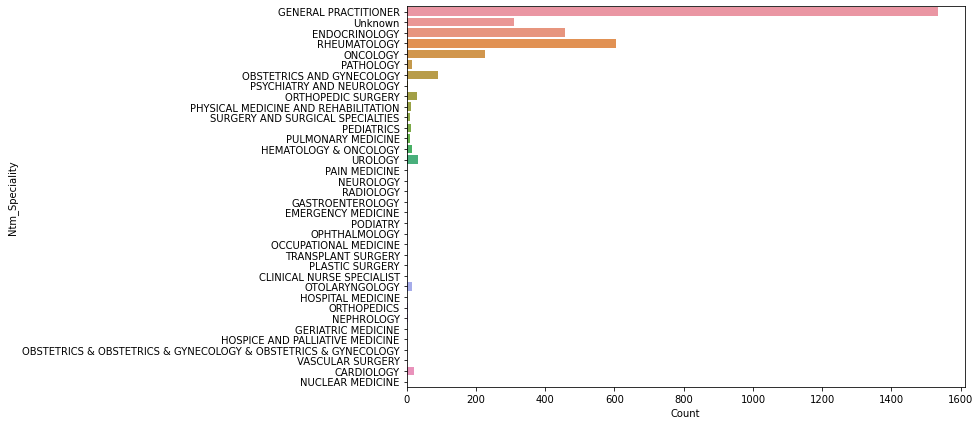

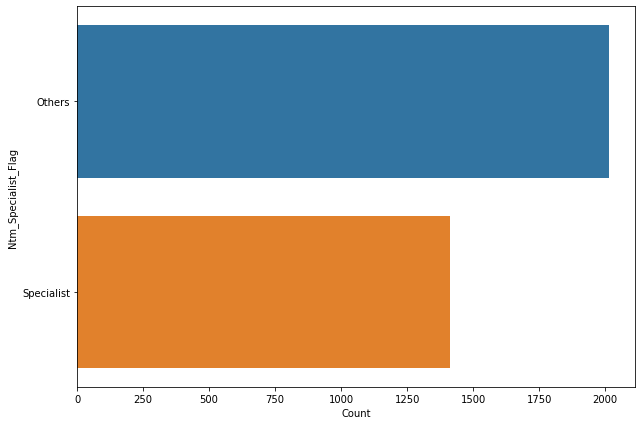

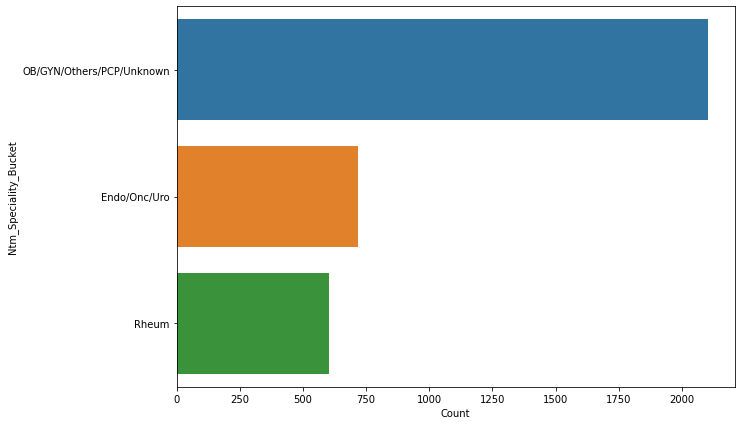

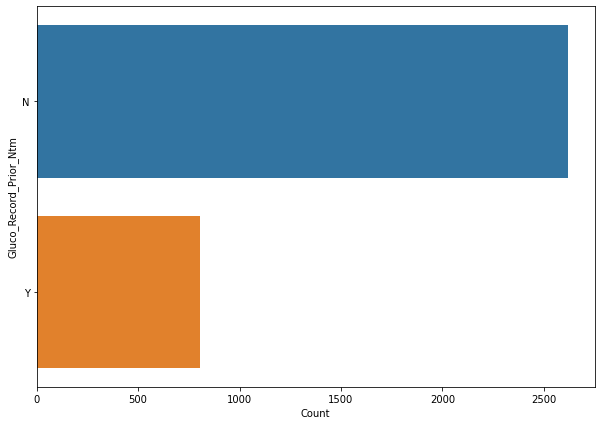

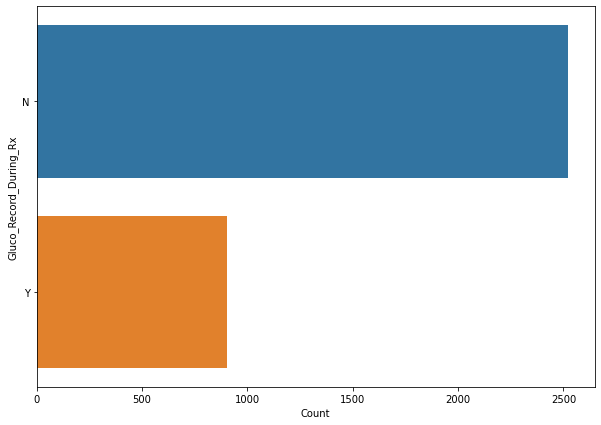

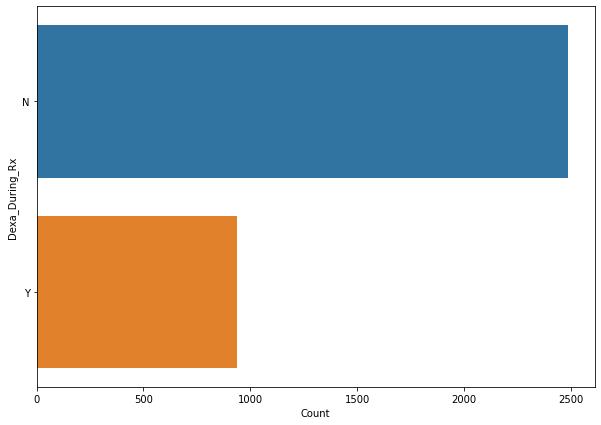

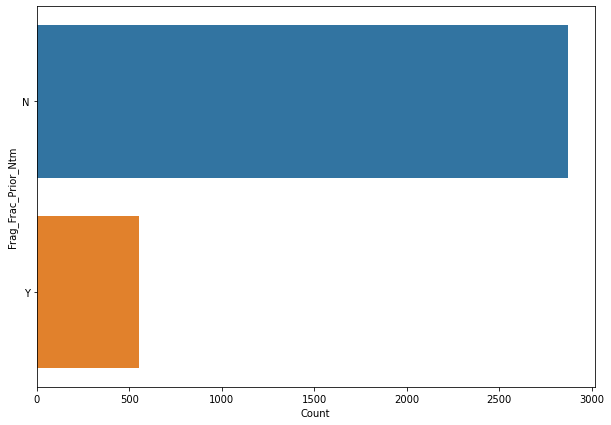

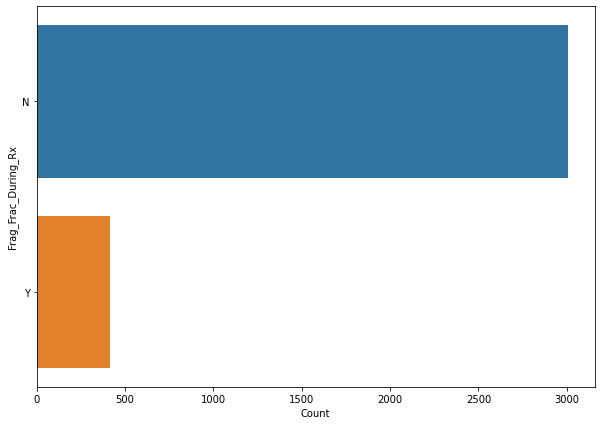

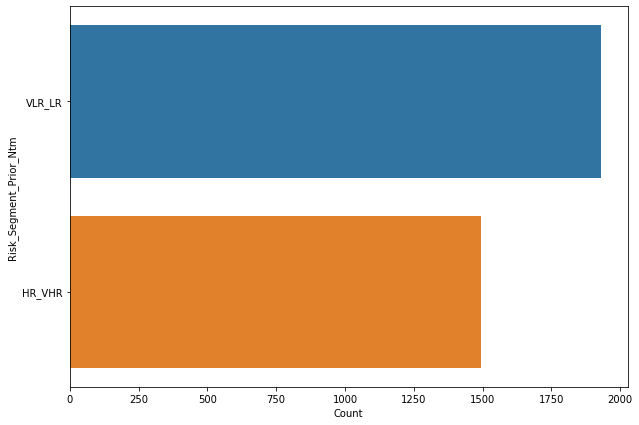

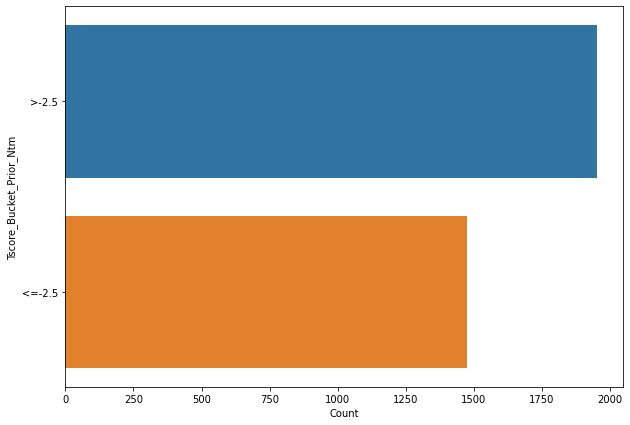

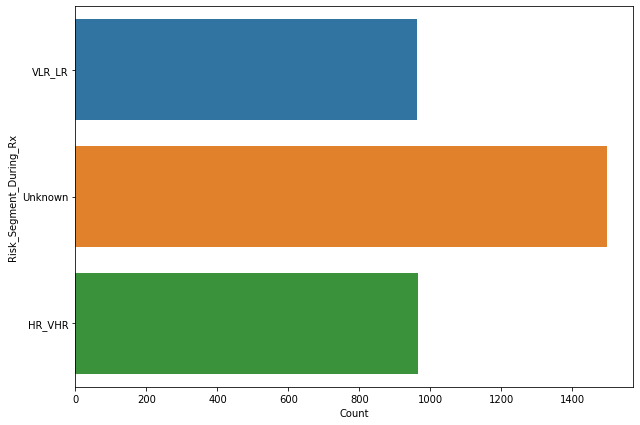

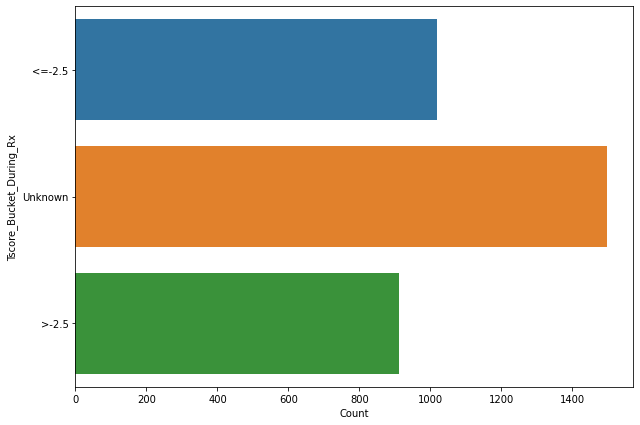

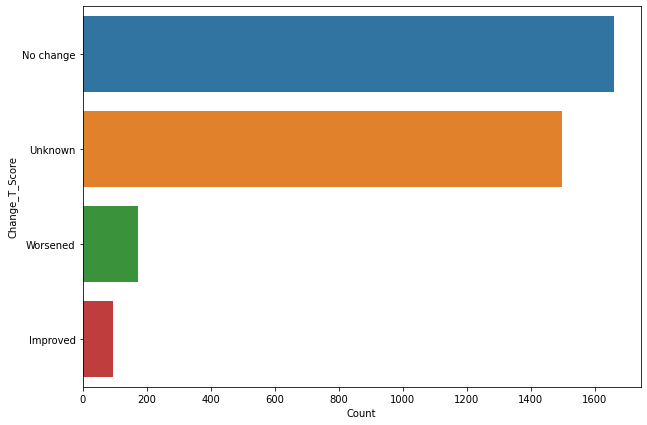

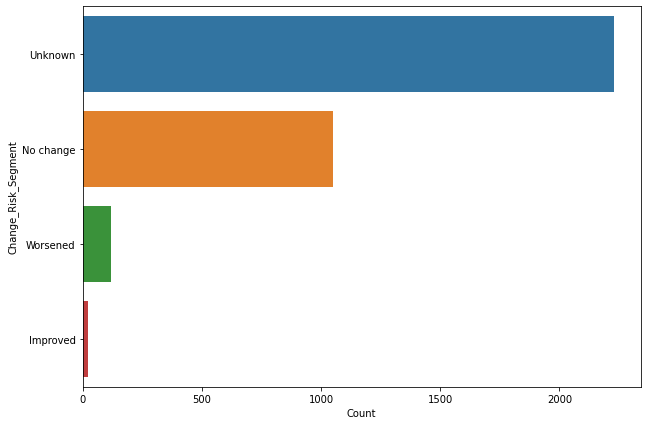

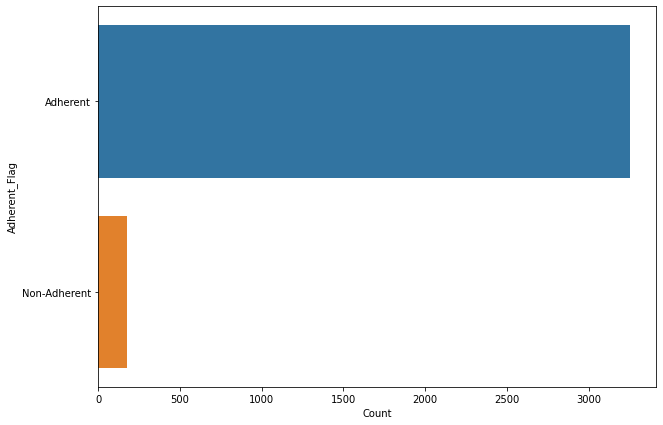

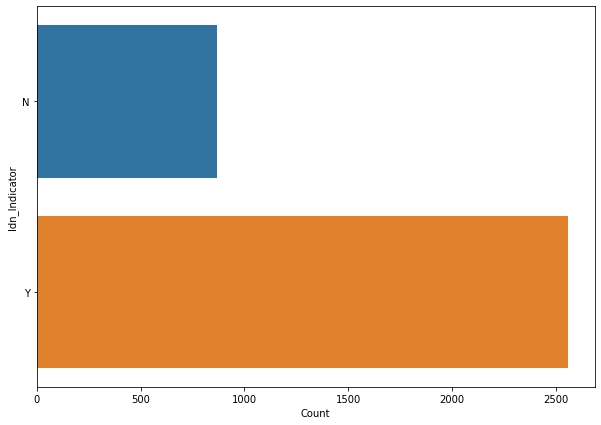

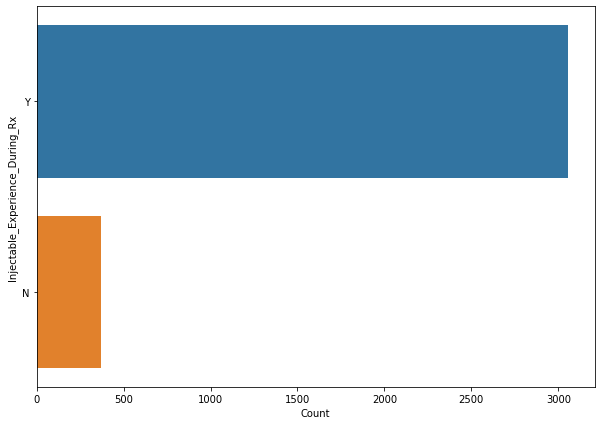

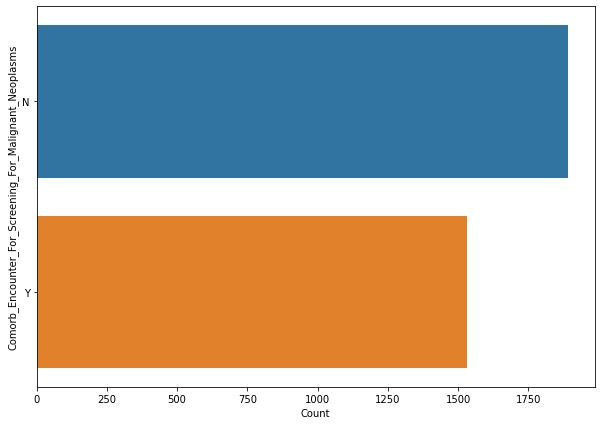

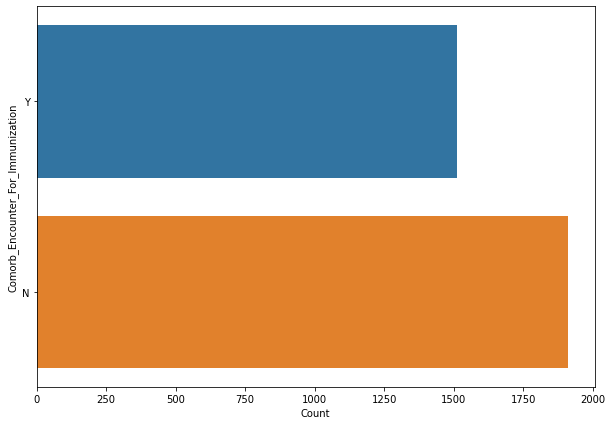

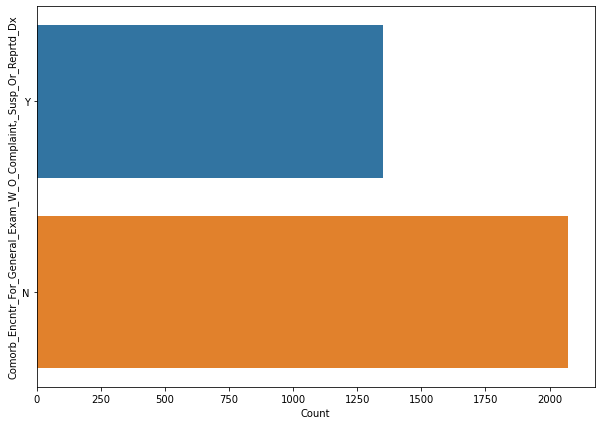

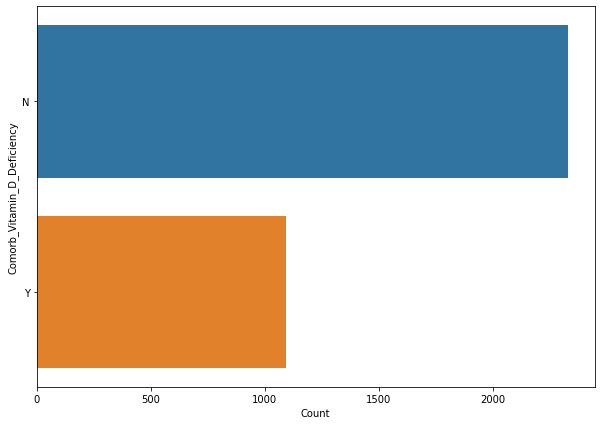

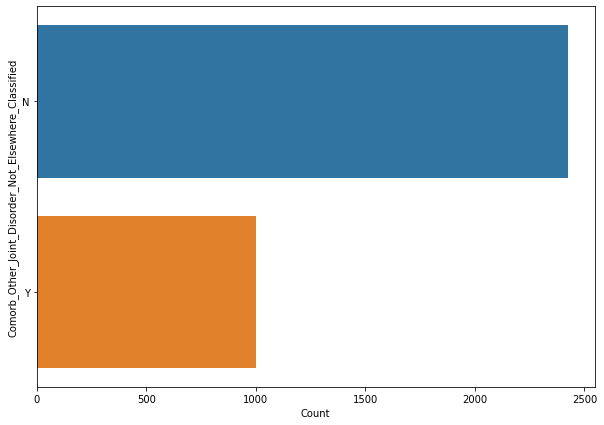

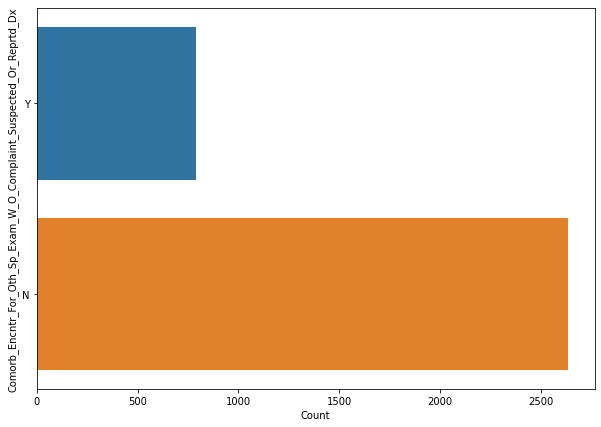

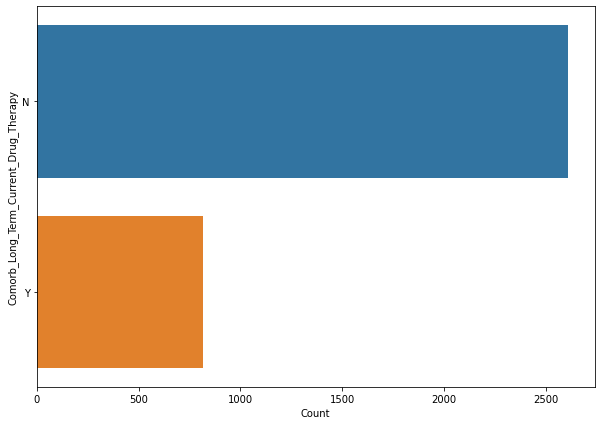

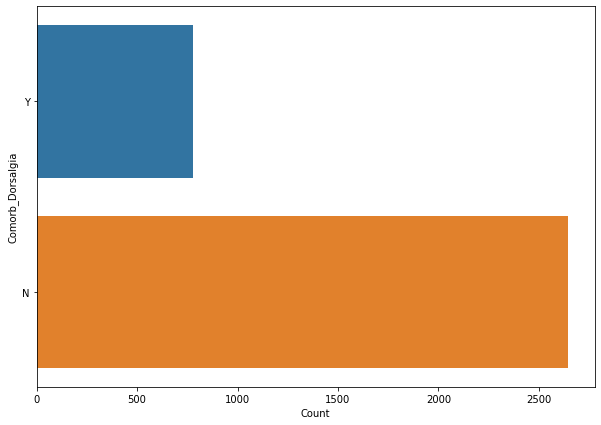

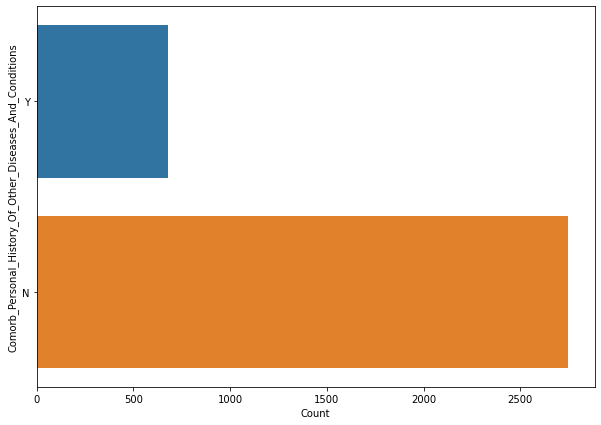

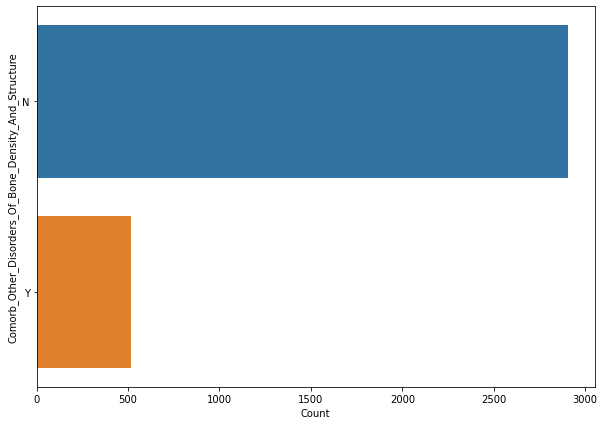

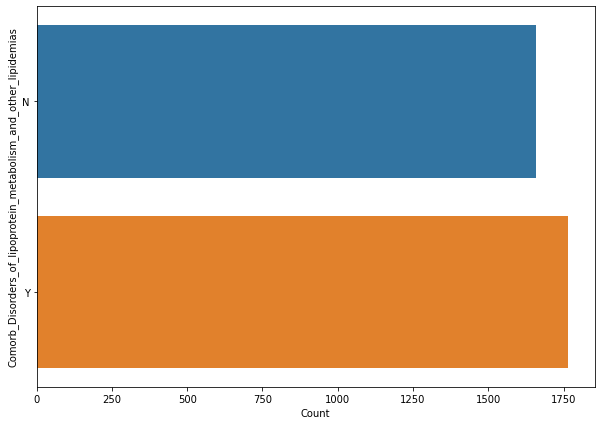

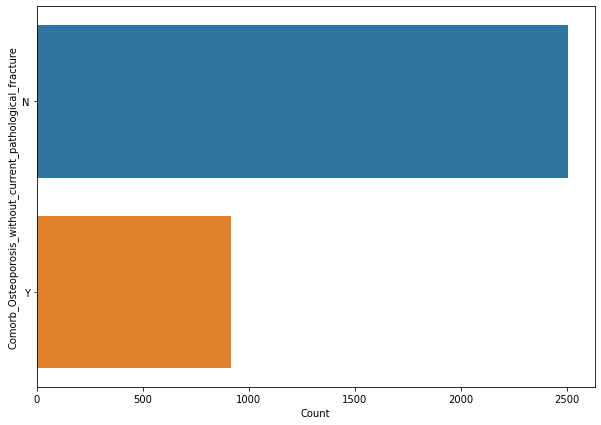

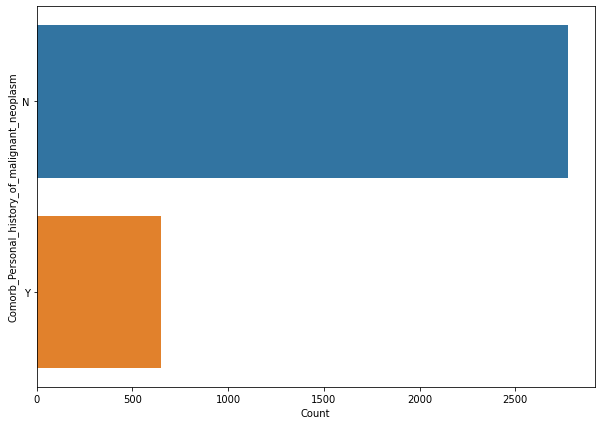

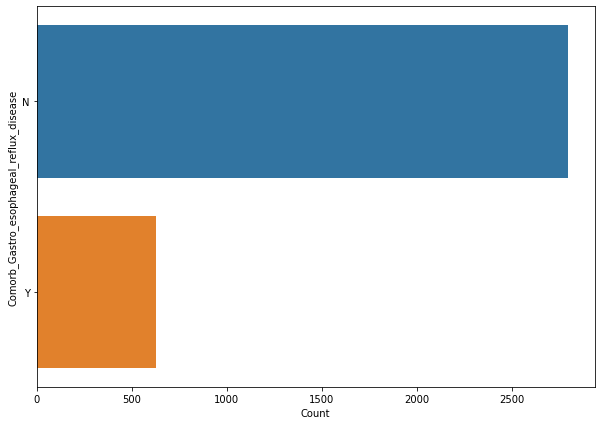

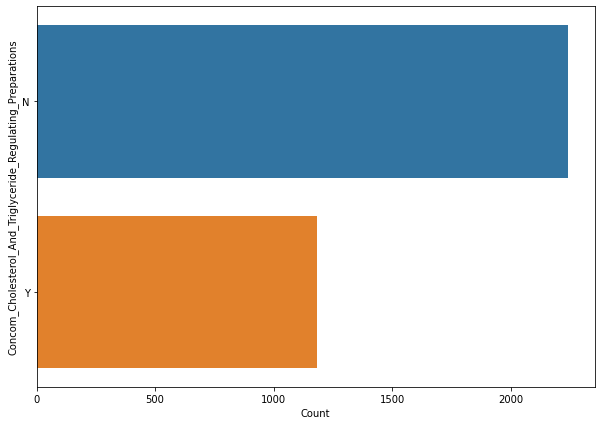

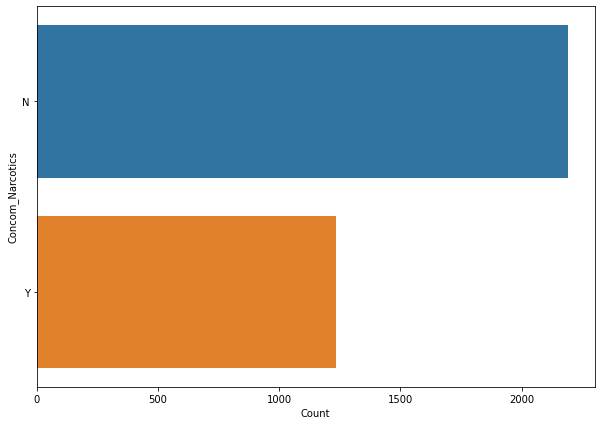

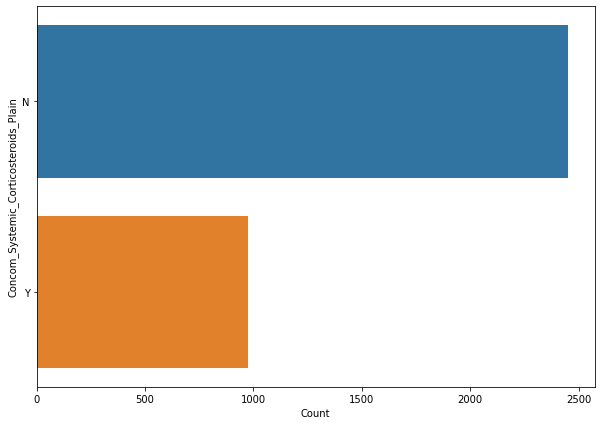

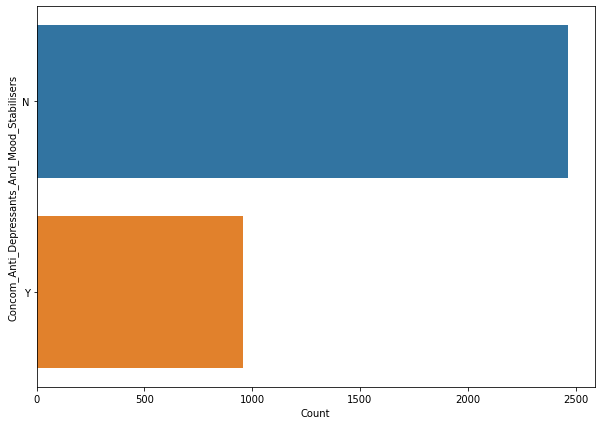

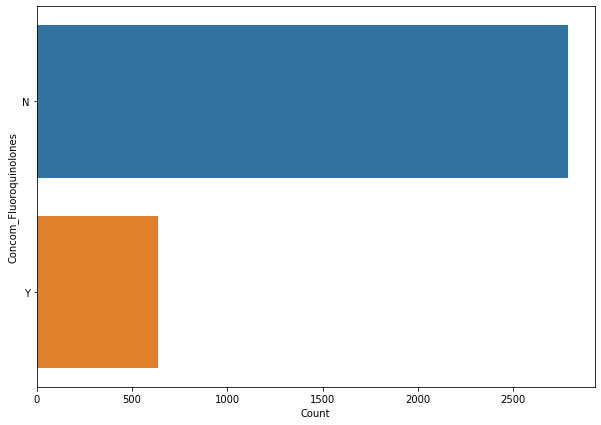

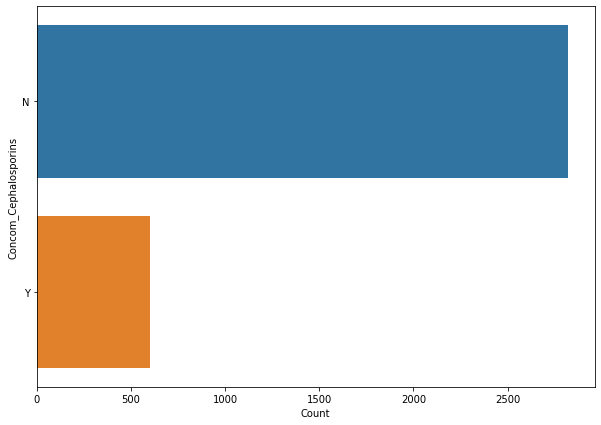

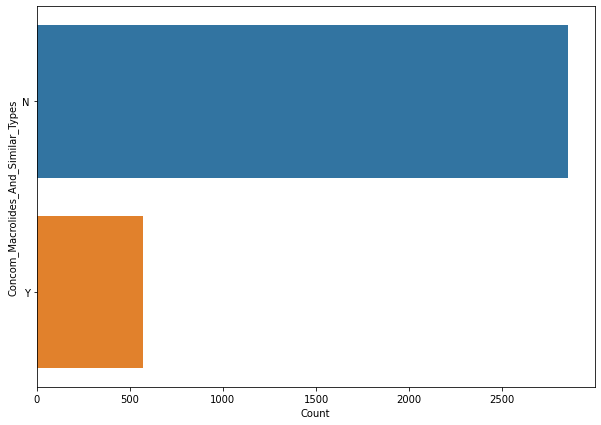

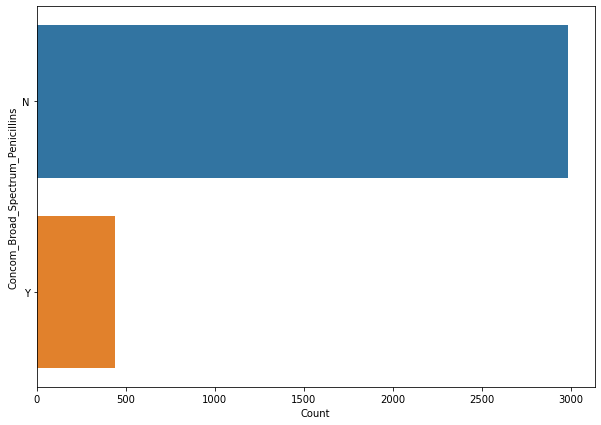

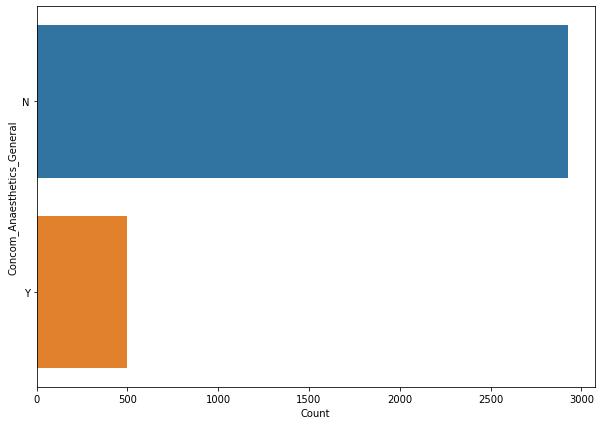

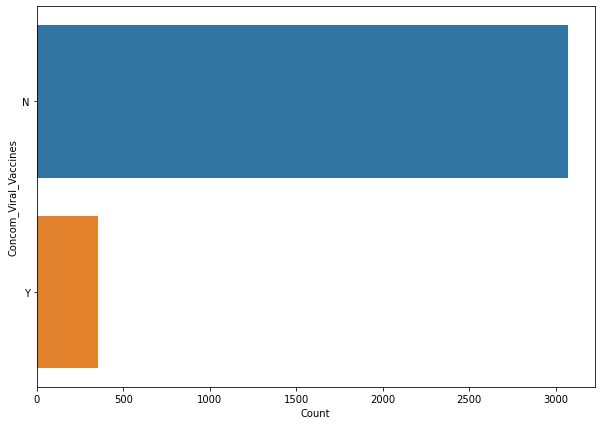

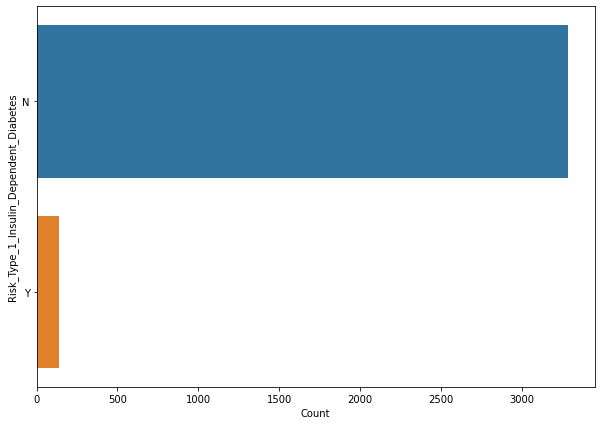

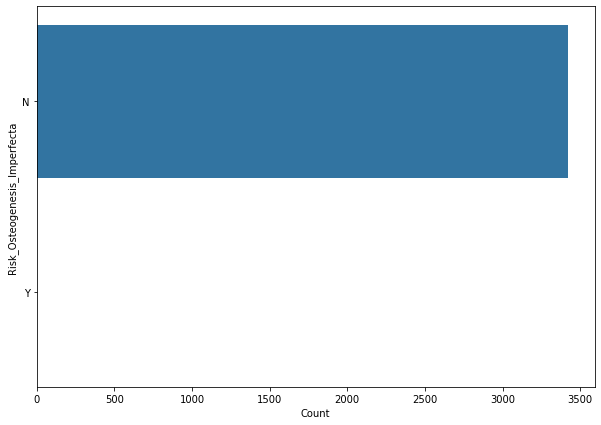

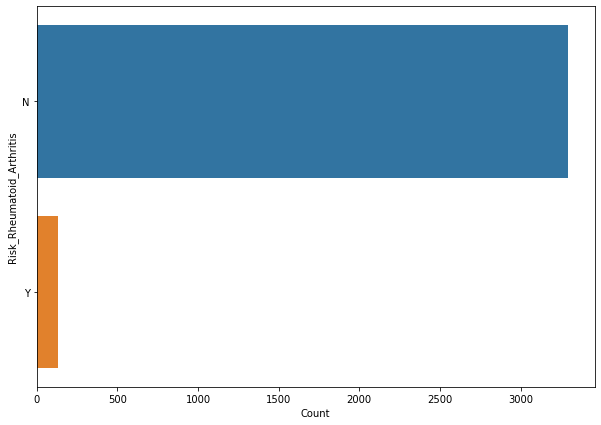

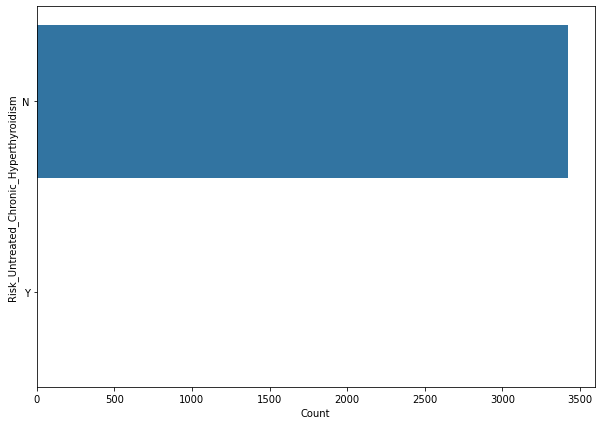

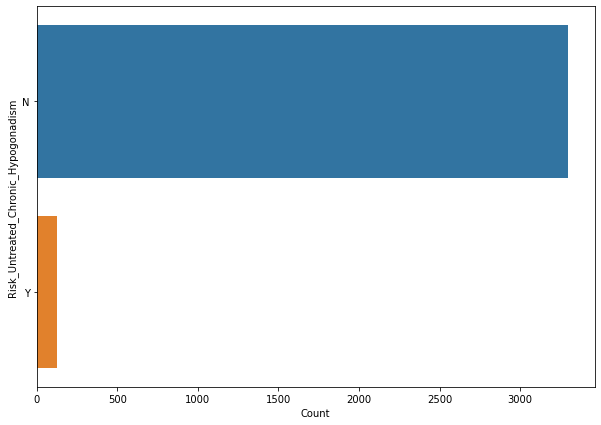

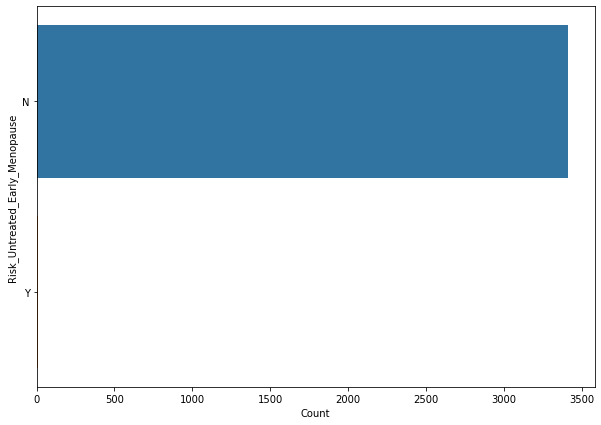

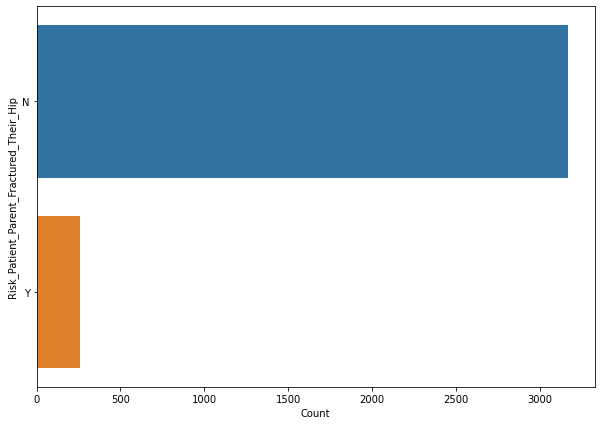

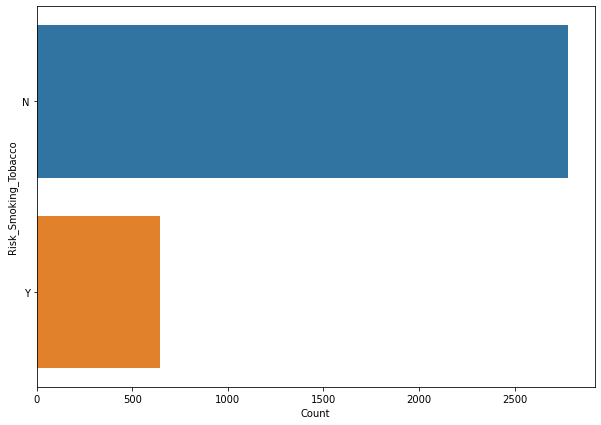

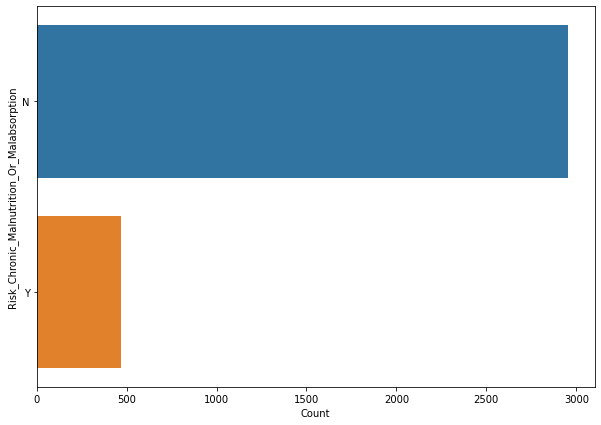

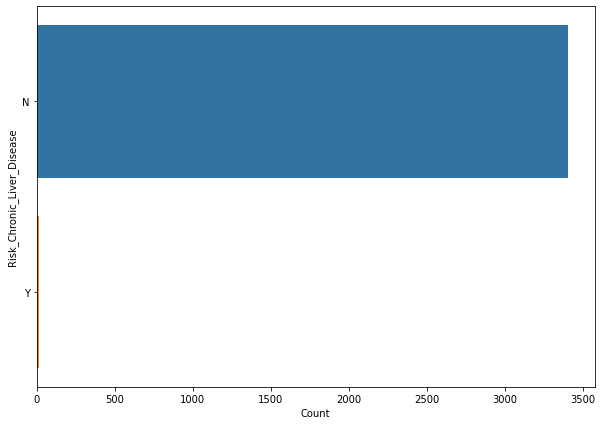

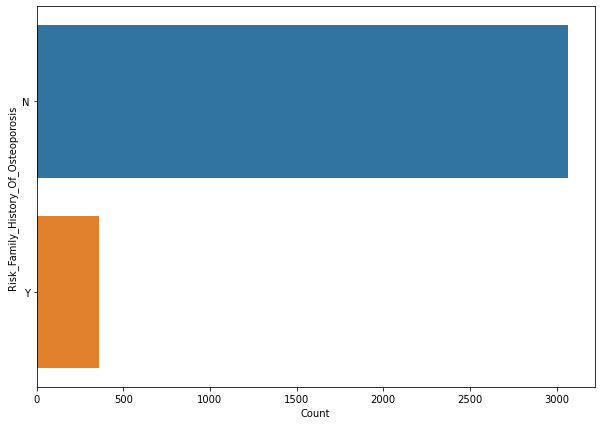

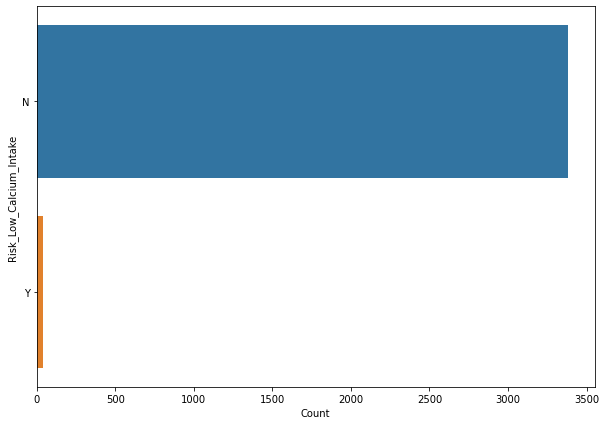

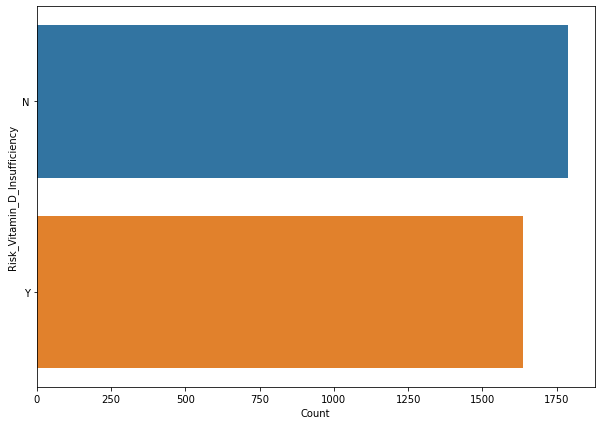

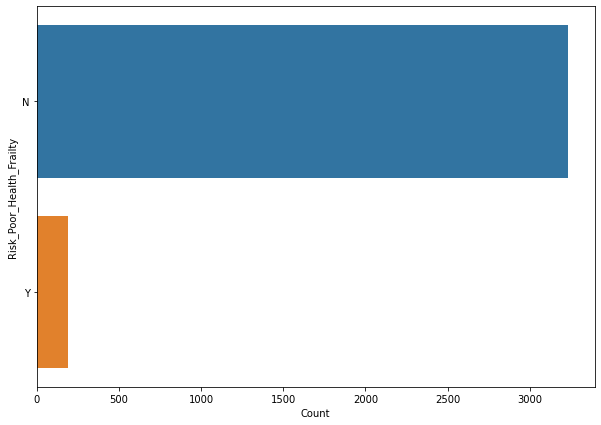

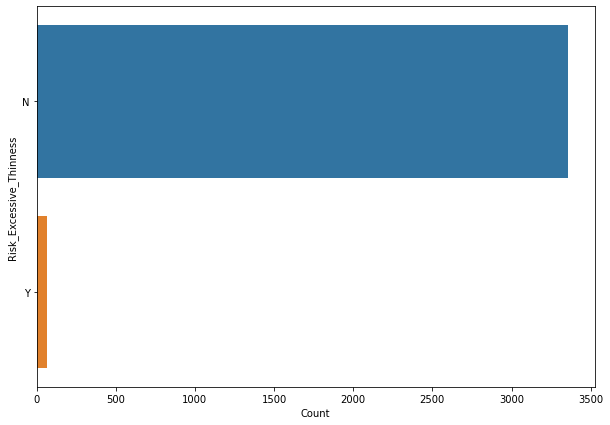

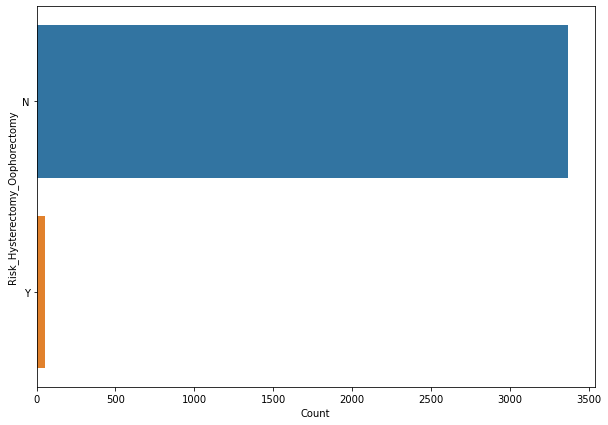

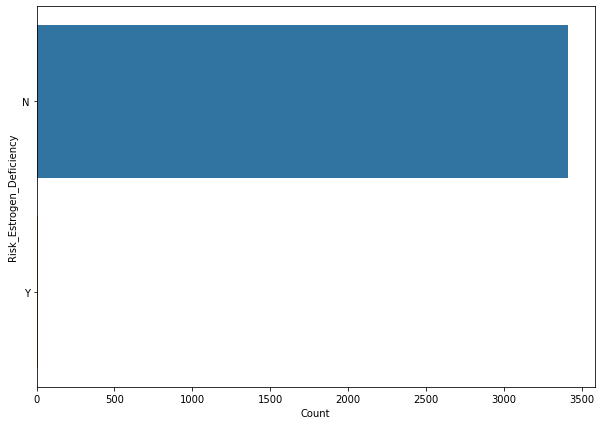

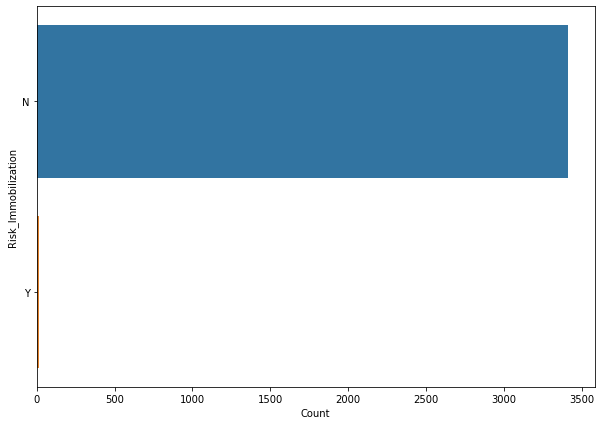

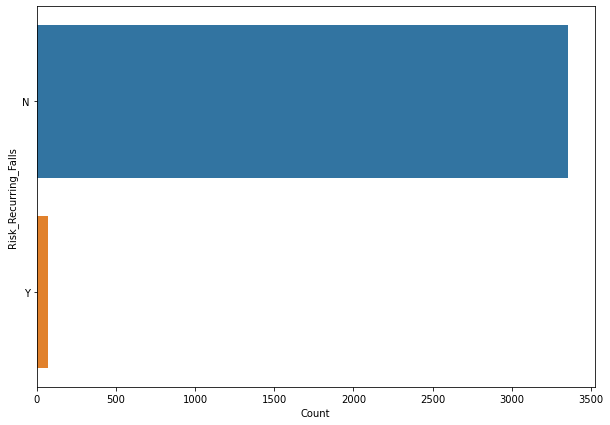

In [ ]:
for cat in categorical_df:
        plt.figure(figsize=(10,7))
        sns.countplot(y=df[cat], orient='horizontal')
        #plt.title('Count plot of ' + cat)
        plt.xlabel('Count') 
        plt.show()

### Skew

In [ ]:
from scipy.stats import skew
import scipy.stats as stats

In [ ]:
#df_skew = df[numerical_df].skew(axis = 0, skipna = True)
#df_skew[0]
#df.skew(axis = 1, skipna = True)

In [ ]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    df_skew = df[variable].skew(axis = 0, skipna = True)
    sns.distplot(df[variable], bins=30);
    plt.title('Histogram'+' ' + ', skew:' + str(df_skew) )

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 864x576 with 0 Axes>

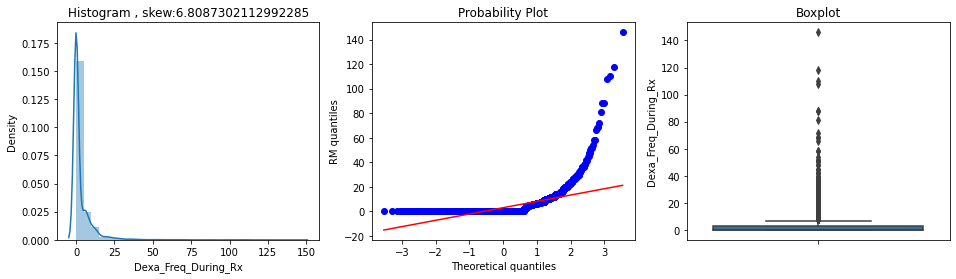

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 864x576 with 0 Axes>

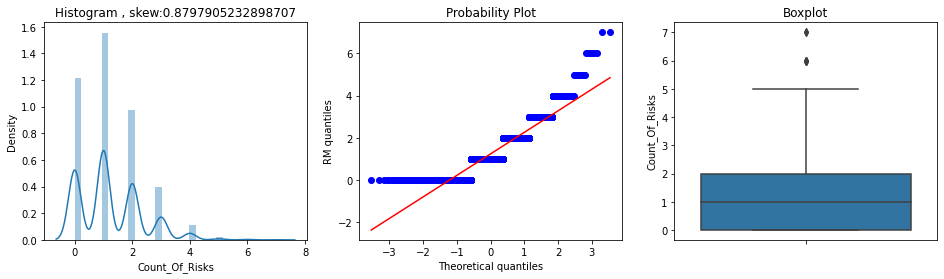

In [ ]:
for i,num in enumerate(numerical_df):
    plt.figure(figsize=(12,8))
    diagnostic_plots(df, num)

### Unknown - Replace with Mode

In [ ]:
# list columns with Unknown
columns = df.columns.to_list()
l_Unknown = []
for col in columns:
  arr = df[col].unique()
  if np.where(arr=='Unknown')[0].size != np.array(0):
    l_Unknown.append(col)
  else:
    continue

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


In [ ]:
df[l_Unknown].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Ethnicity                3424 non-null   object
 1   Ntm_Speciality           3424 non-null   object
 2   Risk_Segment_During_Rx   3424 non-null   object
 3   Tscore_Bucket_During_Rx  3424 non-null   object
 4   Change_T_Score           3424 non-null   object
 5   Change_Risk_Segment      3424 non-null   object
dtypes: object(6)
memory usage: 160.6+ KB


In [ ]:
dfn = df.copy()
columns = dfn.columns

In [ ]:
dfn['Ethnicity'].value_counts()

Not Hispanic    3235
Hispanic          98
Unknown           91
Name: Ethnicity, dtype: int64

In [ ]:
obj_rem=[]
# if Unknown values are 40% more than total size .... remove , if not ... replace with mode
for l in l_Unknown:
    val = dfn[l].value_counts().Unknown
    if val>len(dfn)*0.4:
        #l_Unknown.remove(l)
        dfn.drop(l , axis=1 , inplace=True)
        obj_rem.append(l)
    else:
        dfn[l].replace(to_replace='Unknown', value=dfn[l].mode()[0], inplace=True)
#print(l_Unknown)
dfn['Race'].replace(to_replace='Other/Unknown', value=dfn['Race'].mode()[0], inplace=True)

### Remove outliers

In [ ]:
dfo = dfn.copy()

In [ ]:
numerical_df

['Dexa_Freq_During_Rx', 'Count_Of_Risks']



```
for num in numerical_df:
    #quantils
    Q1=dfn[num].quantile(0.25)
    Q3=dfn[num].quantile(0.75)
    IQR=Q3-Q1

    #upper_lower
    lower_bound= Q1 - 1.5*IQR
    upper_bound= Q3 + 1.5*IQR

    #outlier
    outliers= (dfn[num]< lower_bound) | (dfn[num]> upper_bound)

    #drop outliers
    dfn[num].drop(outliers, axis=0,inplace=True)
```



In [ ]:
cols = numerical_df # one or more

Q1 = dfo[cols].quantile(0.25)
Q3 = dfo[cols].quantile(0.75)
IQR = Q3 - Q1

dfo = dfo[~((dfo[cols] < (Q1 - 1.5 * IQR)) |(dfo[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
dfo.reset_index(drop=True, inplace=True)

In [ ]:
dfo.shape
dfo.drop('Ptid', axis=1, inplace=True)

In [ ]:
dfo.head()

Persistency_Flag  Gender       Race     Ethnicity   Region Age_Bucket  \
0       Persistent    Male  Caucasian  Not Hispanic     West        >75   
1   Non-Persistent    Male      Asian  Not Hispanic     West      55-65   
2   Non-Persistent  Female  Caucasian      Hispanic  Midwest      65-75   
3   Non-Persistent  Female  Caucasian  Not Hispanic  Midwest        >75   
4   Non-Persistent  Female  Caucasian  Not Hispanic  Midwest        >75   

         Ntm_Speciality Ntm_Specialist_Flag      Ntm_Speciality_Bucket  \
0  GENERAL PRACTITIONER              Others  OB/GYN/Others/PCP/Unknown   
1  GENERAL PRACTITIONER              Others  OB/GYN/Others/PCP/Unknown   
2  GENERAL PRACTITIONER              Others  OB/GYN/Others/PCP/Unknown   
3  GENERAL PRACTITIONER              Others  OB/GYN/Others/PCP/Unknown   
4  GENERAL PRACTITIONER              Others  OB/GYN/Others/PCP/Unknown   

  Gluco_Record_Prior_Ntm  ... Risk_Family_History_Of_Osteoporosis  \
0                      N  ...                                   N   
1                      N  ...                                   N   
2                      N  ...                                   N   
3                      N  ...                                   N   
4                      Y  ...                                   N   

   Risk_Low_Calcium_Intake Risk_Vitamin_D_Insufficiency  \
0                        N                            N   
1                        N                            N   
2                        Y                            N   
3                        N                            N   
4                        N                            N   

  Risk_Poor_Health_Frailty Risk_Excessive_Thinness  \
0                        N                       N   
1                        N                       N   
2                        N                       N   
3                        N                       N   
4                        N                       N   

  Risk_Hysterectomy_Oophorectomy Risk_Estrogen_Deficiency Risk_Immobilization  \
0                              N                        N                   N   
1                              N                        N                   N   
2                              N                        N                   N   
3                              N                        N                   N   
4                              N                        N                   N   

  Risk_Recurring_Falls Count_Of_Risks  
0                    N              0  
1                    N              0  
2                    N              2  
3                    N              1  
4                    N              1  

[5 rows x 64 columns]

In [ ]:
dfo.to_csv("healthcare_clean_data.csv",index=False)

### Transforming Categorical Data

In [ ]:
#dfo = pd.read_csv('healthcare_clean_data.csv')
#dfo.head()

Persistency_Flag  Gender       Race     Ethnicity   Region Age_Bucket  \
0       Persistent    Male  Caucasian  Not Hispanic     West        >75   
1   Non-Persistent    Male      Asian  Not Hispanic     West      55-65   
2   Non-Persistent  Female  Caucasian      Hispanic  Midwest      65-75   
3   Non-Persistent  Female  Caucasian  Not Hispanic  Midwest        >75   
4   Non-Persistent  Female  Caucasian  Not Hispanic  Midwest        >75   

         Ntm_Speciality Ntm_Specialist_Flag      Ntm_Speciality_Bucket  \
0  GENERAL PRACTITIONER              Others  OB/GYN/Others/PCP/Unknown   
1  GENERAL PRACTITIONER              Others  OB/GYN/Others/PCP/Unknown   
2  GENERAL PRACTITIONER              Others  OB/GYN/Others/PCP/Unknown   
3  GENERAL PRACTITIONER              Others  OB/GYN/Others/PCP/Unknown   
4  GENERAL PRACTITIONER              Others  OB/GYN/Others/PCP/Unknown   

  Gluco_Record_Prior_Ntm  ... Risk_Family_History_Of_Osteoporosis  \
0                      N  ...                                   N   
1                      N  ...                                   N   
2                      N  ...                                   N   
3                      N  ...                                   N   
4                      Y  ...                                   N   

   Risk_Low_Calcium_Intake Risk_Vitamin_D_Insufficiency  \
0                        N                            N   
1                        N                            N   
2                        Y                            N   
3                        N                            N   
4                        N                            N   

  Risk_Poor_Health_Frailty Risk_Excessive_Thinness  \
0                        N                       N   
1                        N                       N   
2                        N                       N   
3                        N                       N   
4                        N                       N   

  Risk_Hysterectomy_Oophorectomy Risk_Estrogen_Deficiency Risk_Immobilization  \
0                              N                        N                   N   
1                              N                        N                   N   
2                              N                        N                   N   
3                              N                        N                   N   
4                              N                        N                   N   

  Risk_Recurring_Falls Count_Of_Risks  
0                    N              0  
1                    N              0  
2                    N              2  
3                    N              1  
4                    N              1  

[5 rows x 64 columns]

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import make_column_selector as selector
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_df = numerical_columns_selector(dfo)
categorical_df = categorical_columns_selector(dfo)

dff = dfo.copy()

In [ ]:
# list columns with number
columnso = categorical_df
l_2v = []
l_3vm = []
for col in columnso:
  arr = dfo[col].unique()
  if len(arr) == 2:
    l_2v.append(col)
  else:
    l_3vm.append(col)

#### 2 var

In [ ]:
for dv in l_2v:
    le = LabelEncoder()
    dff[dv] = le.fit_transform(dff[dv])

#### 3 var+

In [ ]:
for dv in l_3vm:
    le = LabelEncoder()
    dff[dv] = le.fit_transform(dff[dv])

In [ ]:
dff.head()

Persistency_Flag  Gender  Race  Ethnicity  Region  Age_Bucket  \
0                 1       1     2          1       4           3   
1                 0       1     1          1       4           0   
2                 0       0     2          0       0           1   
3                 0       0     2          1       0           3   
4                 0       0     2          1       0           3   

   Ntm_Speciality  Ntm_Specialist_Flag  Ntm_Speciality_Bucket  \
0               5                    0                      1   
1               5                    0                      1   
2               5                    0                      1   
3               5                    0                      1   
4               5                    0                      1   

   Gluco_Record_Prior_Ntm  ...  Risk_Family_History_Of_Osteoporosis  \
0                       0  ...                                    0   
1                       0  ...                                    0   
2                       0  ...                                    0   
3                       0  ...                                    0   
4                       1  ...                                    0   

   Risk_Low_Calcium_Intake  Risk_Vitamin_D_Insufficiency  \
0                        0                             0   
1                        0                             0   
2                        1                             0   
3                        0                             0   
4                        0                             0   

   Risk_Poor_Health_Frailty  Risk_Excessive_Thinness  \
0                         0                        0   
1                         0                        0   
2                         0                        0   
3                         0                        0   
4                         0                        0   

   Risk_Hysterectomy_Oophorectomy  Risk_Estrogen_Deficiency  \
0                               0                         0   
1                               0                         0   
2                               0                         0   
3                               0                         0   
4                               0                         0   

   Risk_Immobilization  Risk_Recurring_Falls  Count_Of_Risks  
0                    0                     0               0  
1                    0                     0               0  
2                    0                     0               2  
3                    0                     0               1  
4                    0                     0               1  

[5 rows x 64 columns]

### Save clean and transform data

In [ ]:
dff.to_csv("healthcare_clean_transf_data.csv", index=False)

### Feature Relevance 

In [ ]:
data = dff.drop('Persistency_Flag', axis=1)
target = dff['Persistency_Flag']

In [ ]:
data.info()

[21:14:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


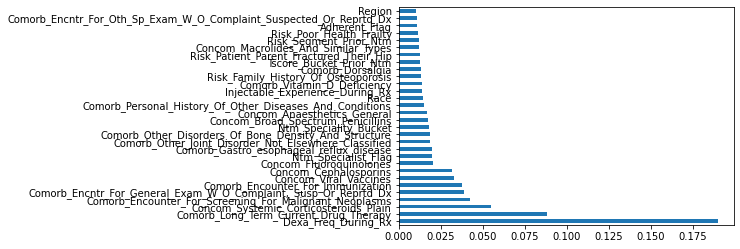

In [ ]:
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(data, target)

(pd.Series(model.feature_importances_, index=data.columns)
   .nlargest(30)
   .plot(kind='barh'))

## EDA

In [ ]:
dfc = pd.read_csv('healthcare_clean_data.csv')
dfc.head()

Persistency_Flag  Gender       Race     Ethnicity   Region Age_Bucket  \
0       Persistent    Male  Caucasian  Not Hispanic     West        >75   
1   Non-Persistent    Male      Asian  Not Hispanic     West      55-65   
2   Non-Persistent  Female  Caucasian      Hispanic  Midwest      65-75   
3   Non-Persistent  Female  Caucasian  Not Hispanic  Midwest        >75   
4   Non-Persistent  Female  Caucasian  Not Hispanic  Midwest        >75   

         Ntm_Speciality Ntm_Specialist_Flag      Ntm_Speciality_Bucket  \
0  GENERAL PRACTITIONER              Others  OB/GYN/Others/PCP/Unknown   
1  GENERAL PRACTITIONER              Others  OB/GYN/Others/PCP/Unknown   
2  GENERAL PRACTITIONER              Others  OB/GYN/Others/PCP/Unknown   
3  GENERAL PRACTITIONER              Others  OB/GYN/Others/PCP/Unknown   
4  GENERAL PRACTITIONER              Others  OB/GYN/Others/PCP/Unknown   

  Gluco_Record_Prior_Ntm  ... Risk_Family_History_Of_Osteoporosis  \
0                      N  ...                                   N   
1                      N  ...                                   N   
2                      N  ...                                   N   
3                      N  ...                                   N   
4                      Y  ...                                   N   

   Risk_Low_Calcium_Intake Risk_Vitamin_D_Insufficiency  \
0                        N                            N   
1                        N                            N   
2                        Y                            N   
3                        N                            N   
4                        N                            N   

  Risk_Poor_Health_Frailty Risk_Excessive_Thinness  \
0                        N                       N   
1                        N                       N   
2                        N                       N   
3                        N                       N   
4                        N                       N   

  Risk_Hysterectomy_Oophorectomy Risk_Estrogen_Deficiency Risk_Immobilization  \
0                              N                        N                   N   
1                              N                        N                   N   
2                              N                        N                   N   
3                              N                        N                   N   
4                              N                        N                   N   

  Risk_Recurring_Falls Count_Of_Risks  
0                    N              0  
1                    N              0  
2                    N              2  
3                    N              1  
4                    N              1  

[5 rows x 64 columns]

In [ ]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_df = numerical_columns_selector(dfc)
categorical_df = categorical_columns_selector(dfc)

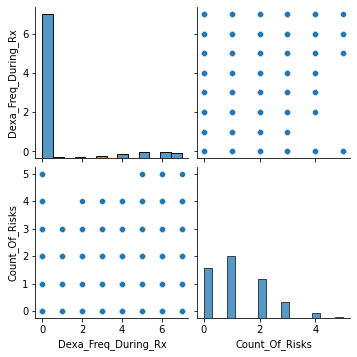

In [ ]:
#plt.figure(figsize=(30,30))
sns.pairplot(dfc[numerical_df])

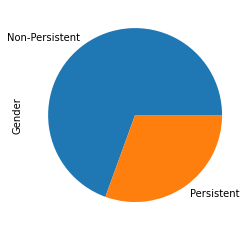

In [ ]:
dfc.groupby('Persistency_Flag').Gender.count().plot(kind='pie')
plt.show()

### Chi test
* Si valor p <= alfa : resultado significativo, rechazar la hipótesis nula (H0), dependiente.
* Si p-value > alpha : resultado no significativo, falla al rechazar la hipótesis nula (H0), independiente.

In [ ]:
dfct = pd.read_csv('healthcare_clean_transf_data.csv') #dff.copy()
dfct.head()

Persistency_Flag  Gender  Race  Ethnicity  Region  Age_Bucket  \
0                 1       1     2          1       4           3   
1                 0       1     1          1       4           0   
2                 0       0     2          0       0           1   
3                 0       0     2          1       0           3   
4                 0       0     2          1       0           3   

   Ntm_Speciality  Ntm_Specialist_Flag  Ntm_Speciality_Bucket  \
0               5                    0                      1   
1               5                    0                      1   
2               5                    0                      1   
3               5                    0                      1   
4               5                    0                      1   

   Gluco_Record_Prior_Ntm  ...  Risk_Family_History_Of_Osteoporosis  \
0                       0  ...                                    0   
1                       0  ...                                    0   
2                       0  ...                                    0   
3                       0  ...                                    0   
4                       1  ...                                    0   

   Risk_Low_Calcium_Intake  Risk_Vitamin_D_Insufficiency  \
0                        0                             0   
1                        0                             0   
2                        1                             0   
3                        0                             0   
4                        0                             0   

   Risk_Poor_Health_Frailty  Risk_Excessive_Thinness  \
0                         0                        0   
1                         0                        0   
2                         0                        0   
3                         0                        0   
4                         0                        0   

   Risk_Hysterectomy_Oophorectomy  Risk_Estrogen_Deficiency  \
0                               0                         0   
1                               0                         0   
2                               0                         0   
3                               0                         0   
4                               0                         0   

   Risk_Immobilization  Risk_Recurring_Falls  Count_Of_Risks  
0                    0                     0               0  
1                    0                     0               0  
2                    0                     0               2  
3                    0                     0               1  
4                    0                     0               1  

[5 rows x 64 columns]

In [ ]:
from sklearn.feature_selection import chi2

dfcat = dfct[categorical_df]

In [ ]:
# Initialize the values in this matrix with 0
resultant = pd.DataFrame(data=[(0 for i in range(len(dfcat.columns))) for i in range(len(dfcat.columns))], 
                         columns=list(dfcat.columns))
resultant.set_index(pd.Index(list(dfcat.columns)), inplace = True)

# Finding p_value for all columns and putting them in the resultant matrix
for i in list(dfcat.columns):
    for j in list(dfcat.columns):
        if i != j:
            chi2_val, p_val = chi2(np.array(dfcat[i]).reshape(-1, 1), np.array(dfcat[j]).reshape(-1, 1))
            resultant.loc[i,j] = p_val
print(resultant)

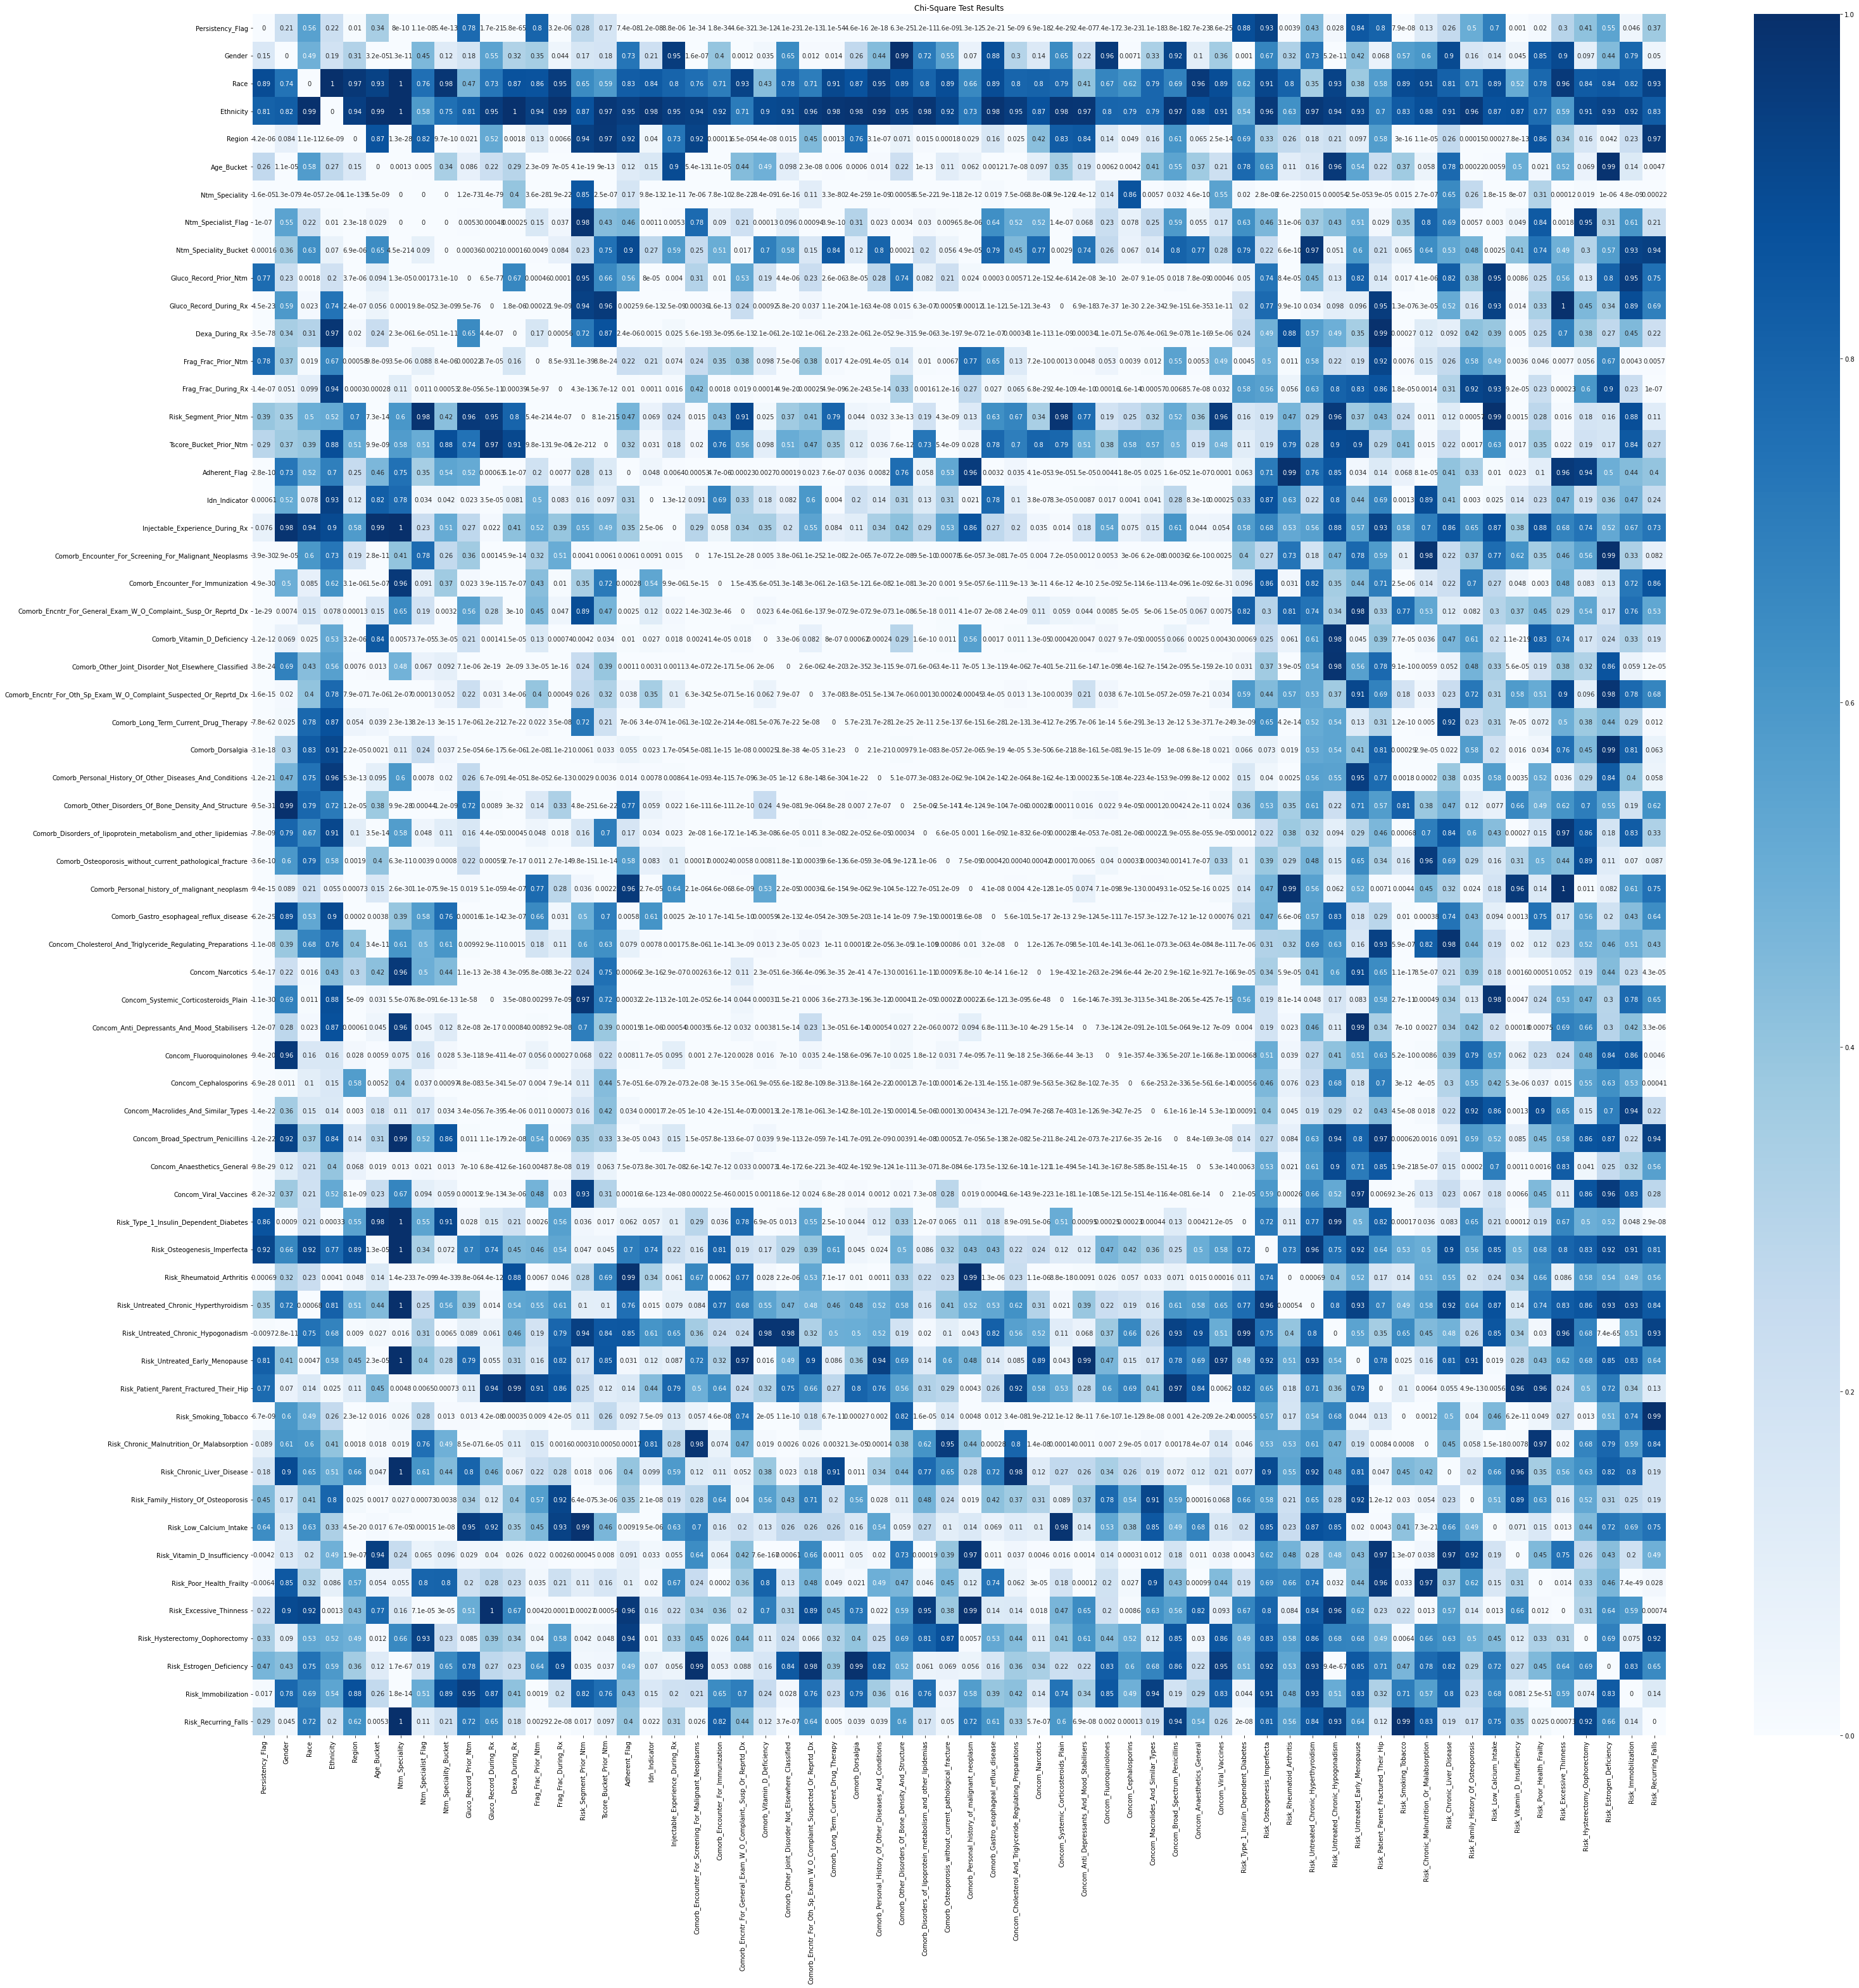

In [ ]:
# Plotting a heatmap
fig = plt.figure(figsize=(50,50))
sns.heatmap(resultant, annot=True, cmap='Blues')
plt.title('Chi-Square Test Results')
plt.show()

In [ ]:
pf = resultant['Persistency_Flag']
best_chi_cat = pf.sort_values(ascending=False)[:30].index.to_list()

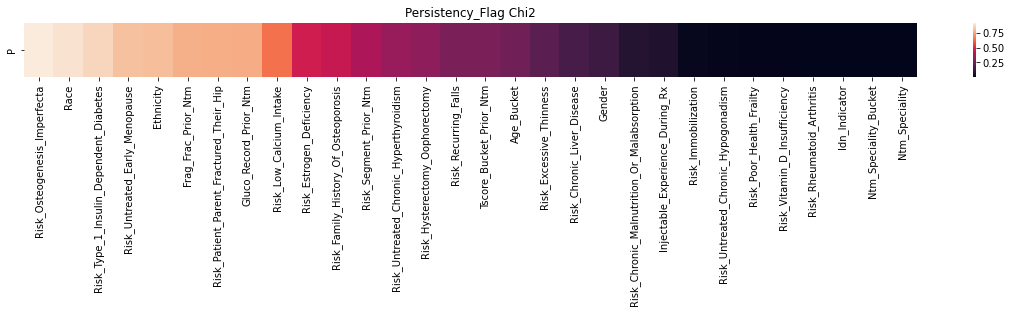

In [ ]:
from IPython.core.pylabtools import figsize
vec1 = pf.sort_values(ascending=False)[:30]
fig, ax = plt.subplots(figsize=(20,1))

sns.heatmap([vec1])
ax.set_title('Persistency_Flag Chi2')
ax.set_yticklabels(labels='Persistency_Flag' , rotation=90);
ax.set_xticklabels(labels=best_chi_cat , rotation=90);

### Correspondence Analysis


In [ ]:
!pip install prince

In [ ]:
import prince
mca = prince.MCA()
mca.fit(dfcat.drop('Persistency_Flag',axis=1))

MCA()

ZeroDivisionError: ignored

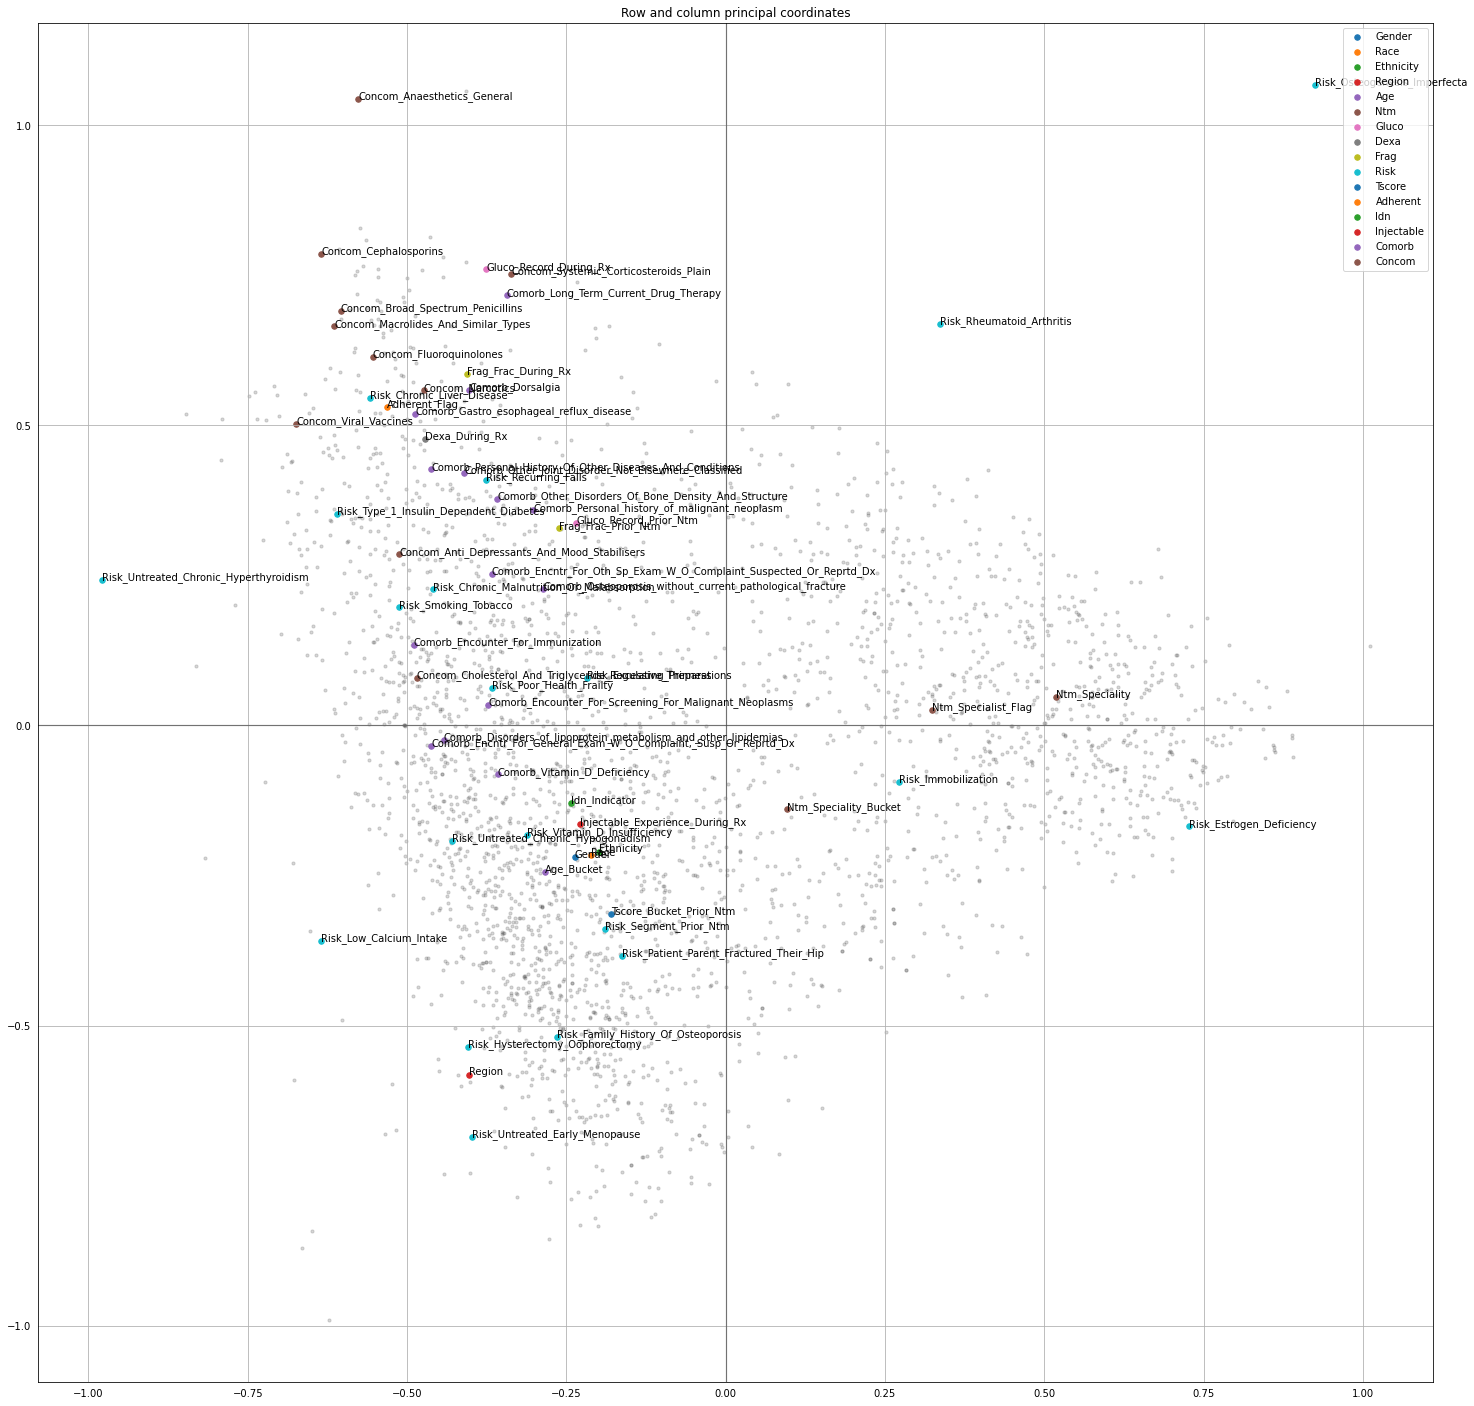

In [ ]:
mca.plot_coordinates(dfcat.drop('Persistency_Flag',axis=1),
                     row_points_alpha=.2,
                     figsize=(25, 25),
                     show_column_labels=True
                    );

### Tornado Chart

In [ ]:
columns = categorical_df
l_yn = []
for col in columns:
  arr = dfc[col].unique()
  x='N'
  if x in arr:
    l_yn.append(col)
  else:
    continue

In [ ]:
dict_yn={}
for col in l_yn:
  dict_yn[col] = [dfc[col].value_counts().to_dict()['N'],dfc[col].value_counts().to_dict()['Y']]

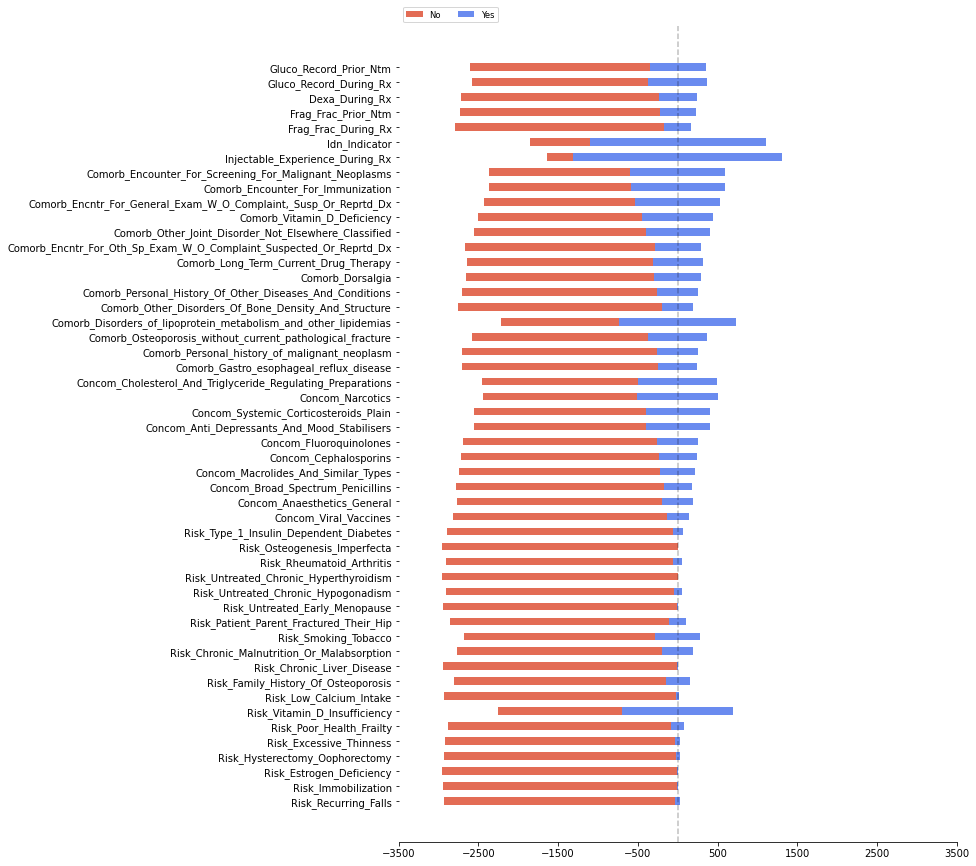

In [ ]:
category_names = ['No', 'Yes']

def survey(results, category_names):
   
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    middle_index = data.shape[1]//2
    offsets = data[:, range(middle_index)].sum(axis=1) + data[:, middle_index]/2
    
    # Color Mapping
    category_colors = plt.get_cmap('coolwarm_r')(
        np.linspace(0.15, 0.85, data.shape[1]))
    
    fig, ax = plt.subplots(figsize=(10, 15))
    
    # Plot Bars
    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths - offsets
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)
    
    # Add Zero Reference Line
    ax.axvline(0, linestyle='--', color='black', alpha=.25)
    
    # X Axis
    #ax.set_xlim(-90, 90)
    ax.set_xticks(np.arange(-3500, 3501, 1000))
    #ax.xaxis.set_major_formatter(lambda x, pos: str(abs(int(x))))
    
    # Y Axis
    ax.invert_yaxis()
    
    # Remove spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    # Ledgend
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')
    
    # Set Background Color
    fig.set_facecolor('#FFFFFF')

    return fig, ax


fig, ax = survey(dict_yn, category_names)
plt.show()

### Crosstabulation


In [ ]:
l_yn.append('Persistency_Flag')
dfyn = dfct[l_yn]
#df_per = dfyn.groupby('Persistency_Flag')

In [ ]:
df_per = dfyn.apply(pd.value_counts)

In [ ]:
def plot3dhist(frec):
    import matplotlib.cm as cm

    xpos=np.arange(frec.shape[0])
    ypos=np.arange(frec.shape[1])
    yposM, xposM = np.meshgrid(ypos+0.5, xpos+0.5)
    zpos=np.zeros(frec.shape).flatten()

    dx = 0.5 * np.ones_like(zpos)
    dy= 0.1 * np.ones_like(zpos)
    dz=frec.values.ravel()

    fig = plt.figure(figsize=(12,9))
    ax = fig.add_subplot(111, projection='3d')


    values = np.linspace(0.2, 1., frec.shape[0])
    cmaps = [cm.Blues, cm.Reds, cm.Greens]
    colors = np.hstack([c(values) for c in cmaps]).reshape(-1, 4)

    ax.bar3d(xposM.ravel(),yposM.ravel(),zpos,dx,dy,dz,color=colors, alpha=0.5)


    ticks_x = np.arange(0.5, 2, 1)
    ax.set_xticks(ticks_x)

    ticks_y=np.arange(0.6,3,1)
    ax.set_yticks(ticks_y)

    ax.w_xaxis.set_ticklabels(frec.index)
    ax.w_yaxis.set_ticklabels(frec.columns)

    ax.set_xlabel('Y/N')
    #ax.set_ylabel('Columns')
    ax.set_zlabel('Occurrence')

    plt.show()

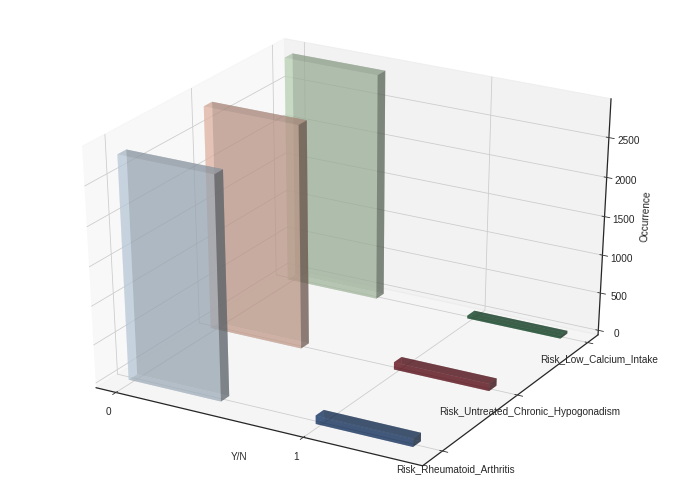

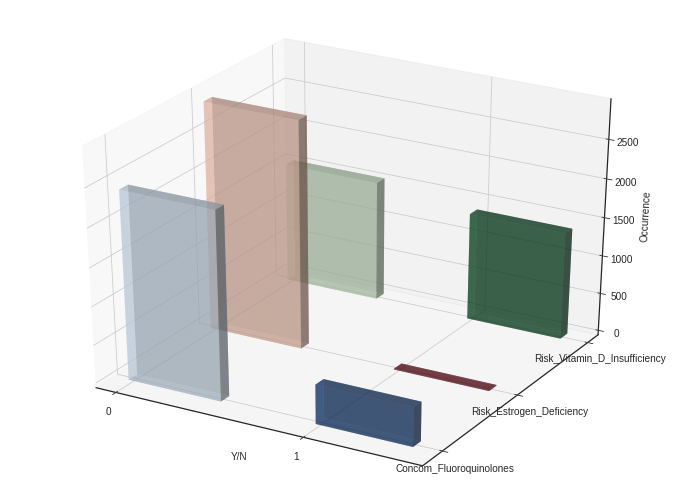

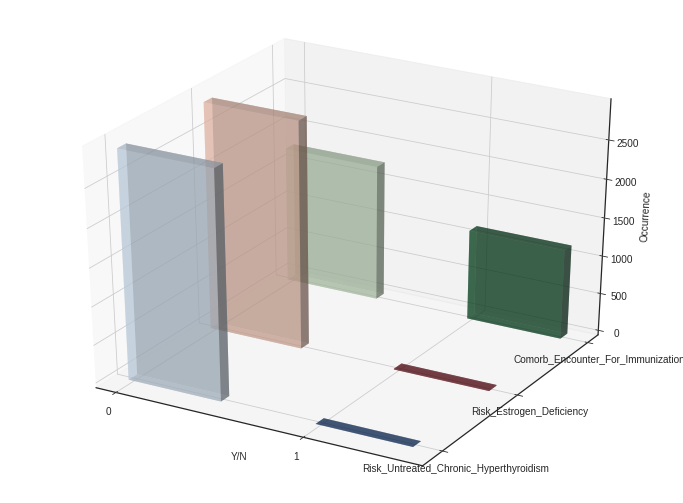

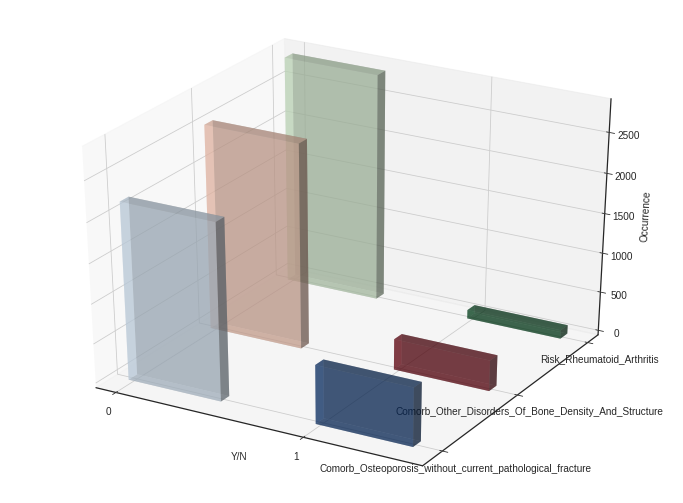

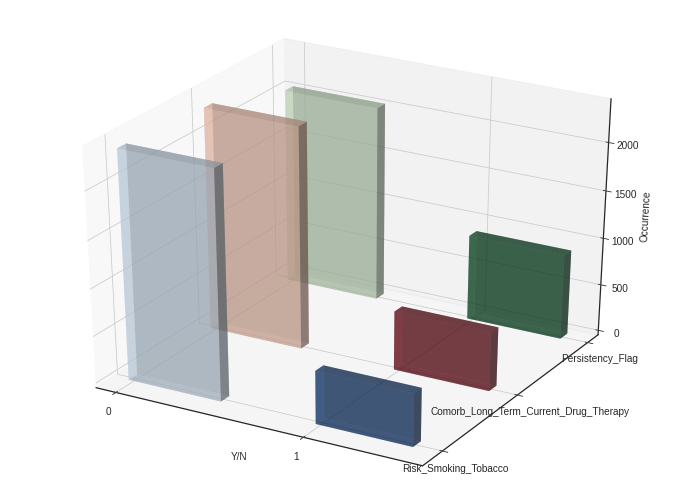

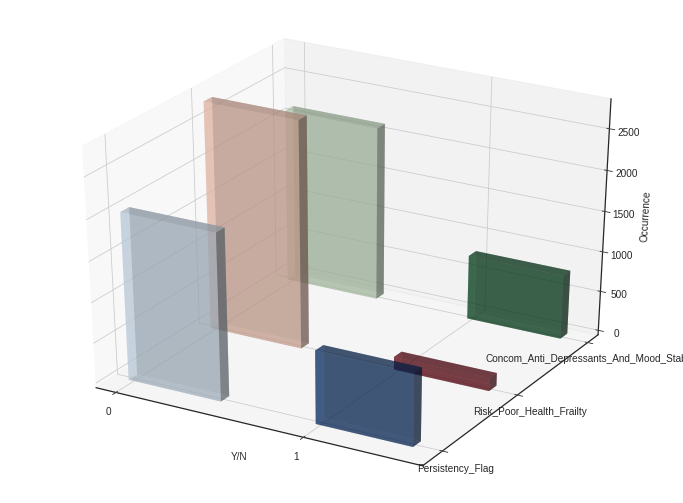

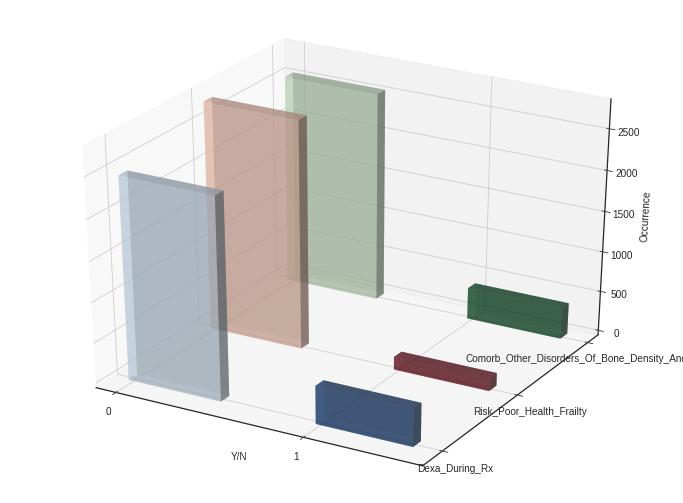

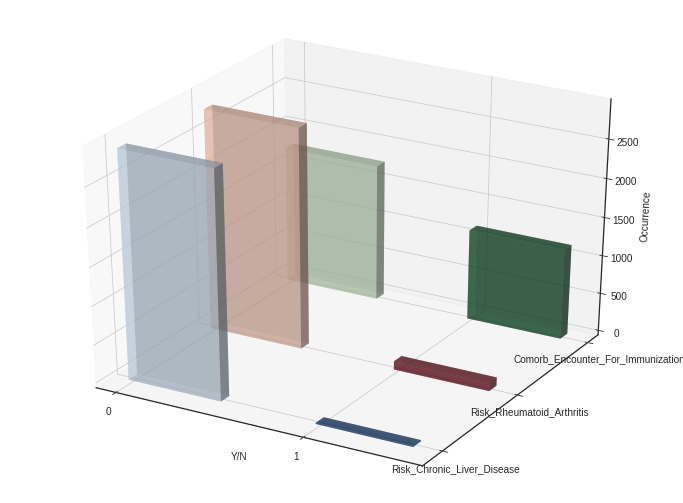

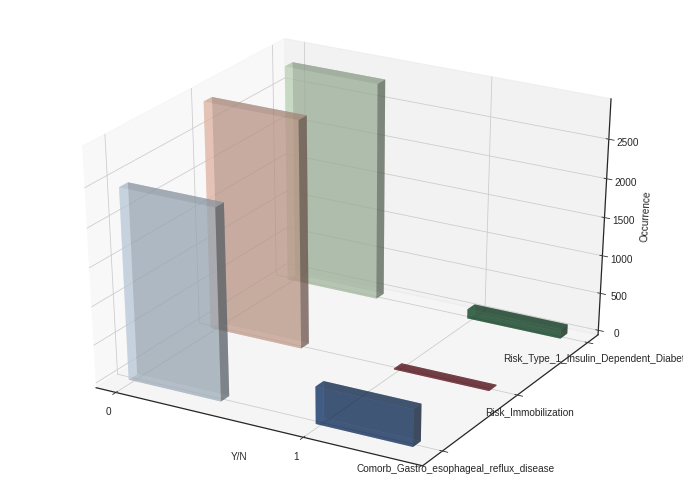

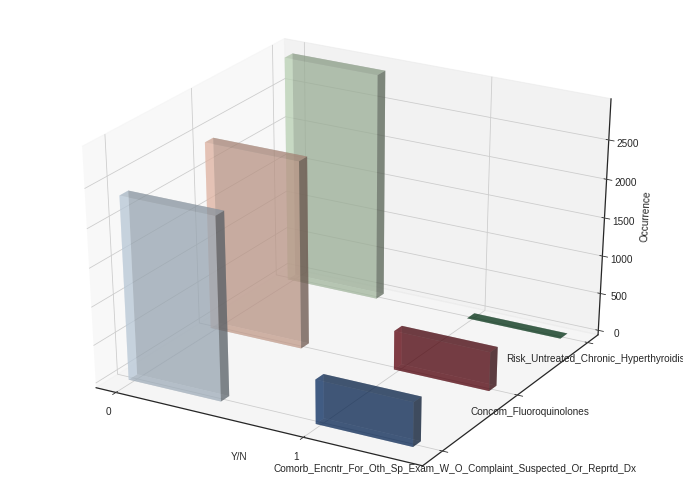

In [ ]:
for i in range(10):
  cols = np.random.choice(df_per.columns.to_list(), 3)
  frec = df_per[cols]
  plot3dhist(frec)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold
from sklearn.metrics import ConfusionMatrixDisplay

# DATA

In [ ]:
dfct = pd.read_csv('healthcare_clean_transf_data.csv') #dff.copy()
dfct.head()

Persistency_Flag  Gender  Race  Ethnicity  Region  Age_Bucket  \
0                 1       1     2          1       4           3   
1                 0       1     1          1       4           0   
2                 0       0     2          0       0           1   
3                 0       0     2          1       0           3   
4                 0       0     2          1       0           3   

   Ntm_Speciality  Ntm_Specialist_Flag  Ntm_Speciality_Bucket  \
0               5                    0                      1   
1               5                    0                      1   
2               5                    0                      1   
3               5                    0                      1   
4               5                    0                      1   

   Gluco_Record_Prior_Ntm  ...  Risk_Family_History_Of_Osteoporosis  \
0                       0  ...                                    0   
1                       0  ...                                    0   
2                       0  ...                                    0   
3                       0  ...                                    0   
4                       1  ...                                    0   

   Risk_Low_Calcium_Intake  Risk_Vitamin_D_Insufficiency  \
0                        0                             0   
1                        0                             0   
2                        1                             0   
3                        0                             0   
4                        0                             0   

   Risk_Poor_Health_Frailty  Risk_Excessive_Thinness  \
0                         0                        0   
1                         0                        0   
2                         0                        0   
3                         0                        0   
4                         0                        0   

   Risk_Hysterectomy_Oophorectomy  Risk_Estrogen_Deficiency  \
0                               0                         0   
1                               0                         0   
2                               0                         0   
3                               0                         0   
4                               0                         0   

   Risk_Immobilization  Risk_Recurring_Falls  Count_Of_Risks  
0                    0                     0               0  
1                    0                     0               0  
2                    0                     0               2  
3                    0                     0               1  
4                    0                     0               1  

[5 rows x 64 columns]

In [ ]:
X = dfct.drop('Persistency_Flag', axis=1)
y = dfct['Persistency_Flag']

[05:15:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


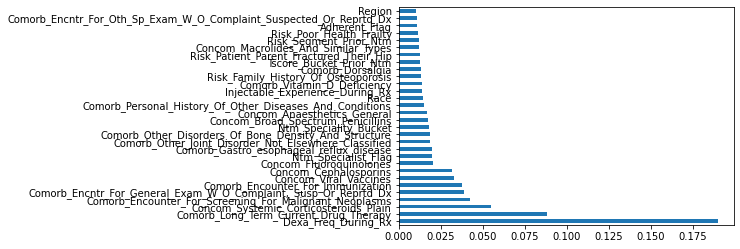

In [ ]:
model = XGBRegressor()
model.fit(X, y)

(pd.Series(model.feature_importances_, index=X.columns)
   .nlargest(30)
   .plot(kind='barh'))

In [ ]:
len(X.columns)

63

In [ ]:
bestparams = pd.Series(model.feature_importances_, index=X.columns).nlargest(35).index.to_list()

In [ ]:
X = dfct[bestparams]
y = dfct['Persistency_Flag']

In [ ]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
cv = KFold(n_splits=5, shuffle=True)

# Models

## Dummy

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_classifier = DummyClassifier(strategy="most_frequent")

dummy_classifier.fit(X_train, y_train)
y_pred_dm= dummy_classifier.predict(X_test)

accuracy_score(y_test, y_pred_dm)

0.7111486486486487

In [ ]:
print(classification_report(y_test, y_pred_dm))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83       421
           1       0.00      0.00      0.00       171

    accuracy                           0.71       592
   macro avg       0.36      0.50      0.42       592
weighted avg       0.51      0.71      0.59       592



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


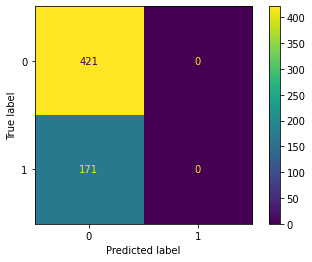

In [ ]:
_ = ConfusionMatrixDisplay.from_estimator(dummy_classifier, X_test, y_test)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lgr= LogisticRegression(solver="liblinear")
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}

n_iter_search = 30
random_search = RandomizedSearchCV(lgr, param_distributions=grid,
                                   n_iter=n_iter_search,n_jobs=-1, cv=cv)
random_search.fit(X_train,y_train)
bestp_lgr = random_search.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 14 is smaller than n_iter=30. Running 14 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


In [ ]:
lgr= LogisticRegression(solver="liblinear", **bestp_lgr)
lgr.fit(X_train, y_train)
y_pred_lgr= lgr.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_lgr)

0.7905405405405406

In [ ]:
print(classification_report(y_test, y_pred_lgr))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       421
           1       0.67      0.53      0.59       171

    accuracy                           0.79       592
   macro avg       0.75      0.71      0.73       592
weighted avg       0.78      0.79      0.78       592



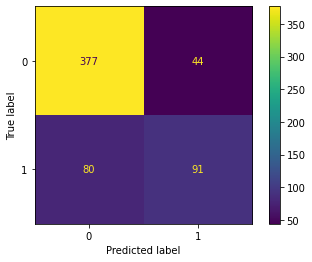

In [ ]:
_ = ConfusionMatrixDisplay.from_estimator(lgr, X_test, y_test)

## Support Vector Machine


In [ ]:
from sklearn.svm import SVC

svc= SVC()

param_grid = {"C": np.arange(2, 10, 2),
             "gamma": np.arange(0.1, 10, 0.2),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

n_iter_search = 30
random_search = RandomizedSearchCV(svc, param_distributions=param_grid,
                                   n_iter=n_iter_search,n_jobs=-1, cv=cv)
random_search.fit(X_train,y_train)
bestp_svc = random_search.best_params_

In [ ]:
svc= SVC(**bestp_svc)
svc.fit(X_train, y_train)
y_pred_svc= svc.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_svc)

0.8006756756756757

In [ ]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87       421
           1       0.69      0.56      0.62       171

    accuracy                           0.80       592
   macro avg       0.76      0.73      0.74       592
weighted avg       0.79      0.80      0.79       592



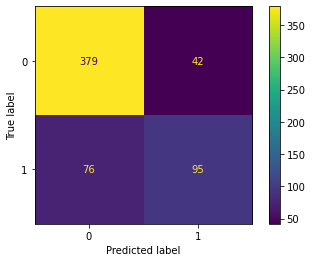

In [ ]:
_ = ConfusionMatrixDisplay.from_estimator(svc, X_test, y_test)

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

n_iter_search = 30
random_search = RandomizedSearchCV(knn, param_distributions=param_grid,
                                   n_iter=n_iter_search,n_jobs=-1, cv=cv)
random_search.fit(X_train,y_train)
bestp_knn = random_search.best_params_

In [ ]:
knn= KNeighborsClassifier(**bestp_knn)
knn.fit(X_train, y_train)
y_pred_knn= knn.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_knn)

0.8023648648648649

In [ ]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87       421
           1       0.79      0.43      0.56       171

    accuracy                           0.80       592
   macro avg       0.80      0.69      0.71       592
weighted avg       0.80      0.80      0.78       592



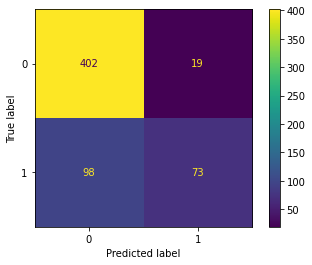

In [ ]:
_ = ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)

## RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, n_jobs=2, random_state=0)
rf.fit(X_train, y_train)
y_pred_rf= knn.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_rf)

0.8023648648648649

In [ ]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87       421
           1       0.79      0.43      0.56       171

    accuracy                           0.80       592
   macro avg       0.80      0.69      0.71       592
weighted avg       0.80      0.80      0.78       592



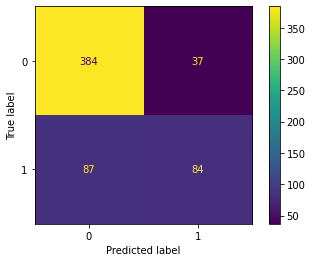

In [ ]:
_ = ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)

## SGDClassifier

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.utils.fixes import loguniform
import scipy.stats as stats

clf = SGDClassifier(loss='hinge',fit_intercept=True)
param_dist = {'average': [True, False],
              'l1_ratio': stats.uniform(0, 1),
              'alpha': loguniform(1e-4, 1e0)}

n_iter_search = 30
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search,n_jobs=-1, cv=cv)
random_search.fit(X_train,y_train)
bestp_clf = random_search.best_params_

In [ ]:
clf = SGDClassifier(**bestp_clf)
clf.fit(X_train, y_train)
y_pred_clf= clf.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_clf)

0.785472972972973

In [ ]:
print(classification_report(y_test, y_pred_clf))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       421
           1       0.66      0.53      0.59       171

    accuracy                           0.79       592
   macro avg       0.74      0.71      0.72       592
weighted avg       0.78      0.79      0.78       592



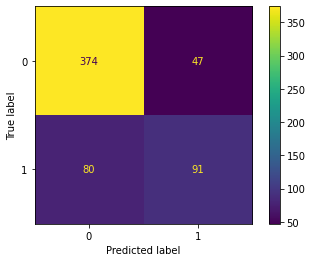

In [ ]:
_ = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

## Hist Gradient Boosting

In [ ]:
HistGradientBoostingClassifier.get_params().keys()

dict_keys(['categorical_features', 'early_stopping', 'l2_regularization', 'learning_rate', 'loss', 'max_bins', 'max_depth', 'max_iter', 'max_leaf_nodes', 'min_samples_leaf', 'monotonic_cst', 'n_iter_no_change', 'random_state', 'scoring', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

histogram_gradient_boosting = HistGradientBoostingClassifier()

parameters = {
 'max_iter': [1000,1200,1500],
 'learning_rate': [0.1,0.001,1],
 'max_depth' : [15, 25, 50, 75],
 'l2_regularization': [0,1.5],
 'scoring': ['f1_micro'],
 }

hgb_grid = GridSearchCV(histogram_gradient_boosting, parameters, n_jobs=-1, 
 cv=cv, verbose=2, refit=True)
 
hgb_grid.fit(X_train, y_train)

bestp_hg = hgb_grid.best_params_

Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [ ]:
hgb_grid = HistGradientBoostingClassifier(**bestp_hg)
hgb_grid.fit(X_train, y_train)
y_pred_histogram_gradient_boosting= hgb_grid.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_histogram_gradient_boosting)

0.7956081081081081

In [ ]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87       421
           1       0.79      0.43      0.56       171

    accuracy                           0.80       592
   macro avg       0.80      0.69      0.71       592
weighted avg       0.80      0.80      0.78       592



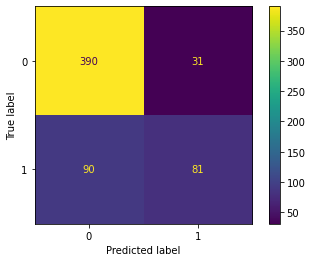

In [ ]:
_ = ConfusionMatrixDisplay.from_estimator(hgb_grid, X_test, y_test)

# Best Model

In [ ]:
models=[lgr, knn, svc, rf, clf, hgb_grid]

In [ ]:
results = pd.DataFrame()   
results.empty

for model in models:
    names=model.__class__.__name__
    y_pred=model.predict(X_test)
    accuracy=accuracy_score(y_test, y_pred)
    result=pd.DataFrame([[names, accuracy*100]], columns=["models", "accuracy"])
    results=results.append(result)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Comparison of Models')

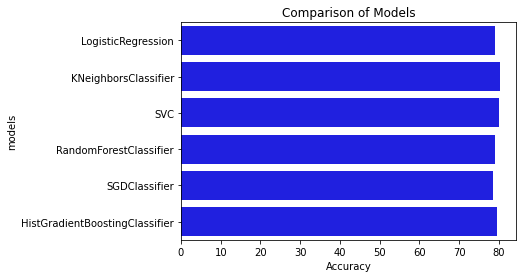

In [ ]:
sns.barplot("accuracy", "models", data=results, color="b")
plt.xlabel("Accuracy")
plt.title("Comparison of Models")

# Metrics

## ROC

<Figure size 1080x720 with 0 Axes>

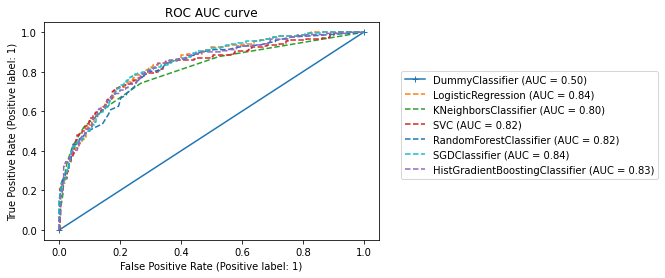

In [ ]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, roc_auc_score

disp = RocCurveDisplay.from_estimator(
    dummy_classifier, X_test, y_test, pos_label=1,
    marker="+")
disp = RocCurveDisplay.from_estimator(
    lgr, X_test, y_test, pos_label=1,
    color="tab:orange", linestyle="--", ax=disp.ax_)
disp = RocCurveDisplay.from_estimator(
    knn, X_test, y_test, pos_label=1,
    color="tab:green", linestyle="--", ax=disp.ax_)
disp = RocCurveDisplay.from_estimator(
    svc, X_test, y_test, pos_label=1,
    color="tab:red", linestyle="--", ax=disp.ax_)
disp = RocCurveDisplay.from_estimator(
    rf, X_test, y_test, pos_label=1,
    color="tab:blue", linestyle="--", ax=disp.ax_)
disp = RocCurveDisplay.from_estimator(
    clf, X_test, y_test, pos_label=1,
    color="tab:cyan", linestyle="--", ax=disp.ax_)
disp = RocCurveDisplay.from_estimator(
    hgb_grid, X_test, y_test, pos_label=1,
    color="tab:purple", linestyle="--", ax=disp.ax_)

plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
_ = disp.ax_.set_title("ROC AUC curve")

## Recall

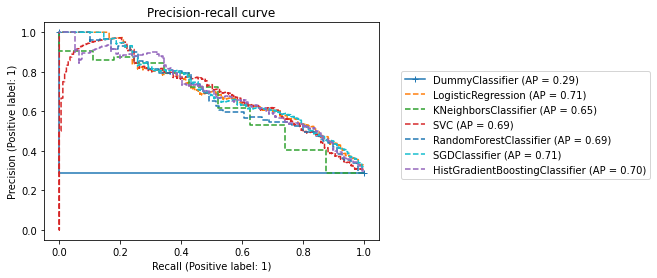

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import precision_score, recall_score

disp = PrecisionRecallDisplay.from_estimator(
    dummy_classifier, X_test, y_test, pos_label=1,
    marker="+")
disp = PrecisionRecallDisplay.from_estimator(
    lgr, X_test, y_test, pos_label=1,
    color="tab:orange", linestyle="--", ax=disp.ax_)
disp = PrecisionRecallDisplay.from_estimator(
    knn, X_test, y_test, pos_label=1,
    color="tab:green", linestyle="--", ax=disp.ax_)
disp = PrecisionRecallDisplay.from_estimator(
    svc, X_test, y_test, pos_label=1,
    color="tab:red", linestyle="--", ax=disp.ax_)
disp = PrecisionRecallDisplay.from_estimator(
    rf, X_test, y_test, pos_label=1,
    color="tab:blue", linestyle="--", ax=disp.ax_)
disp = PrecisionRecallDisplay.from_estimator(
    clf, X_test, y_test, pos_label=1,
    color="tab:cyan", linestyle="--", ax=disp.ax_)
disp = PrecisionRecallDisplay.from_estimator(
    hgb_grid, X_test, y_test, pos_label=1,
    color="tab:purple", linestyle="--", ax=disp.ax_)


plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
_ = disp.ax_.set_title("Precision-recall curve")

END!